# Basic Python Knowledge

Source:
* <a href="https://runestone.academy/runestone/books/published/pythonds/index.html" target="_blank"> Runestone Academy </a>
* <a href="https://harvard-iacs.github.io/2019-CS109A/" target="_blank">CS 109A </a> 

** Content **
* Data Structures
* Proper Class
* Recursion
* Sorting and Searching
* Trees and Tree Algorithm
* Gaphs and Graph Algorithms

***
`Goal: Proficiency in automating mundane data collection, cleaning and analysis task`
***


In [ ]:
#Import Libraries
from math import sqrt

## 1.9 Data Structure

In [ ]:
# Input and outputting strings
YourWord = input("What's your word: ")
print("The length of your word is", len(YourWord))

#Converting Input
YourNumber = input("Radius of your circle: ")
radius = float(YourNumber)
diameter = 2 * radius
print("The diameter of your circle is ", diameter)


In [ ]:
# String formatting- changing the seperator and end arguments
print("Hello")
print("Hello","World")
print()

print("Hello","World", sep="***")
print()

print("Hello","World", end="***")
print()
print()

#Formatted strings using placeholders conversion characters (%)
aName = "Tobias"
age = 19
print("%s is %d years old." % (aName, age))



In [ ]:
anumber = int(input("Please enter an integer: "))

if anumber < 0:
    raise RuntimeError("You can't use a negative number")
else:
    print(sqrt(anumber))
        

In [ ]:
# Defining Functions The syntax for this function definition includes the name, square, and a parenthesized list of formal parameters. For this function, n is the only formal parameter, which suggests that square needs only one piece of data to do its work
def square(n):
    return n**2

square(3)
square(square(5))

In [ ]:
# Newton's Square Root Method

def squareroot(n):
    root = n/2
    for k in range(20):
        root = (1/2)*(root + (n/root))
        print(root)
        
    return root

squareroot(55643)


In [ ]:
# Creating a Class: a new Fraction object

class Fraction:
    
    #Methods go here, first start with the constructor
    def __init__(self,top,bottom):
        
        #Two pieces of state data, the numerator and denominator
        self.num = top
        self.den = bottom
        
    # Forgetting to convert the fraction object into a string will print the actual reference that is stored in the variable (the address itself)
    # Therefore, Convert the class into a string using the __str__ method and arrange them into fraction formate
    def __str__(self):
        return str(self.num)+"/"+str(self.den)
    
    # Overriding the Addition operand to work with the new Fraction struct
    def __add__(self,otherfraction):

        newnum = self.num*otherfraction.den + otherfraction.num*self.den
        newden = self.den*otherfraction.den
        
        #Now to simplify the fraction with a Greatest Common Divisor Function (iterating on Euclid's Algorithm)
        def gcd(m,n):
            while m%n != 0:
                oldm = m
                oldn = n
                
                m = oldn
                n = oldm%oldn
            return n
        
        common = gcd(newnum,newden)
        return Fraction(newnum//common, newden//common)
    

    
myf = Fraction(3,5)
print(myf)
print()

# Testing new operation function
f1 = Fraction(1,4)
f2 = Fraction(1,2)
f3 = f1+f2
print(f3)
        

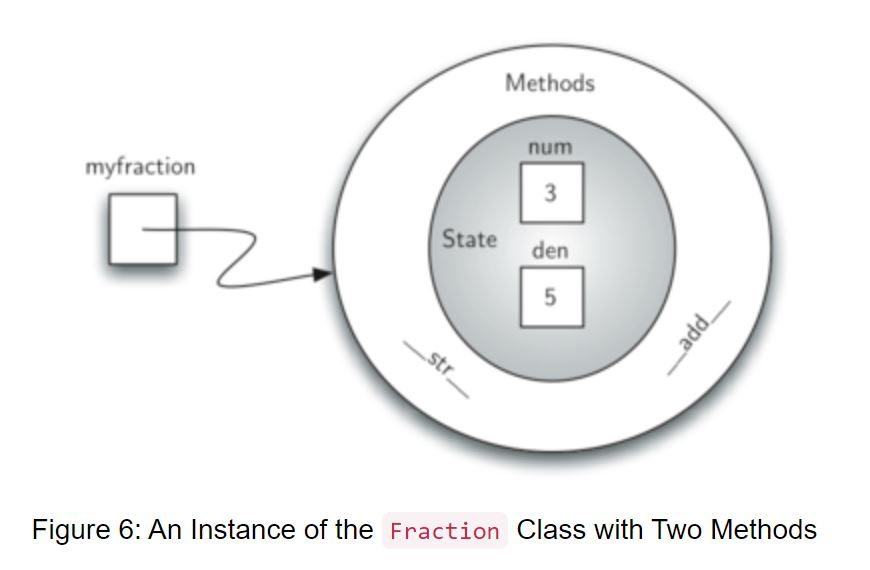

## 2.1 Writing a Proper Python Class


Considerations for designing a class
* docstring provided on how to use the class
* Have a \__st\__ magic method to give it a meaningful string representation
* Have a \__repr\__ magic method for representation in the interactive shell
* It should be comparable with other instances (i.e. \__eq\__ and \__lt\__)
* Think about access control for each instance variable

Consideration for classes that's a container
* Find out how many things the container holds using len
* Iterate over the items in the container
* You may want to allow users to access the items in the container using the square bracket index notation.

In [ ]:
import random

class MSDie:
    """
    Multi-sided die

    Instance Variables:
        current_value
        num_sides

    """

    def __init__(self, num_sides):
        self.num_sides = num_sides
        self.current_value = self.roll()

    def roll(self):
        self.current_value = random.randrange(1,self.num_sides+1)
        return self.current_value

my_die = MSDie(6)
for i in range(5):
    print(my_die.current_value)
    my_die.roll()

d_list = [MSDie(6), MSDie(20)]
print(d_list)




In [ ]:
# Demonstrates what __str__ does

class Person:
    pass

# We tried creating a object from the class Person and printed it out
p = Person()
# It showed a Person instance at some memory reference
print(p)


# Next we again redefined the class overriding the __str__ method and when printed out the object reference it displayed the string which was returned from the __str__ method.
class BetterPerson:
    def __str__(self):
        return 'BetterPerson Class'
    
g = BetterPerson()
print(g)

In [ ]:
# if we could just print(my_die) and have the value of the die show up without having to know about the instance variable called current_value.
import random

class MSDie:
    """
    Multi-sided die

    Instance Variables:
        current_value
        num_sides

    """

    def __init__(self, num_sides):
        self.num_sides = num_sides
        self.current_value = self.roll()

    def roll(self):
        self.current_value = random.randrange(1,self.num_sides+1)
        return self.current_value

    def __str__(self):
        return str(self.current_value)

    def __repr__(self):
        return "MSDie({}) : {}".format(self.num_sides, self.current_value)
    
    
my_die = MSDie(6)
for i in range(5):
    print(my_die)
    my_die.roll()

d_list = [MSDie(6), MSDie(20)]
print(d_list)

## 3.1 Algorithm Analysis


Algorithm: Step-by-step list of instructions for solving any instance of a problem.
Program: An algorithm that has been encoded into some programming language.

#### A better algorithm
* More readable (i.e. better variable name)
* Efficient in use of computing resources (i.e. space, memory)

In [18]:
# Tracking the execution time for a function
import time


# One algorithmic approach 
def sumOfN2(n):
   start = time.time()

   theSum = 0
   for i in range(1,n+1):
      theSum = theSum + i

   end = time.time()

# By calling this function twice, at the beginning and at the end, and then computing the difference, we can get an exact number of seconds (fractions in most cases) for execution
   return theSum,end-start

# Test with n = 1 million
test = sumOfN2(10000000)
print("Using the first algorithmic approach, the sum is %d required %10.7f seconds"% test)
print()

#second algorithmic approach
def sumofN3(n):
    start = time.time()
    answer = (n*(n+1))/2
    end = time.time()
    
    return answer, end-start
    

test2 = sumofN3(10000000)
print("Using the first algorithmic approach, the sum is %d required %10.7f seconds"% test2)


#The second algorithm is clearly faster and more efficient (in our language and computer). The time stays consistent no matter the value of the integer


Using the first algorithmic approach, the sum is 50000005000000 required  1.8038225 seconds

Using the first algorithmic approach, the sum is 50000005000000 required  0.0000000 seconds


### 3.3 Big-O Notation
A benchmark that judges algorithm alone from machine, program, time of day, compiler, and programming language. 

The question is how do we distinguish the size of a computer problem, and  our goal then is to show how the algorithm’s execution time changes with respect to the size of the problem.

Big O Notation is an approximation of the number of steps it takes an algorithm to perform a function. 

<table>
  <thead>
    <tr>
      <th colspan = '2'>
          <h3> <br> Common Functions for Big O </h3>
      </th>
      </tr>
      <tr>
      <th>O(n)</th>
      <th>Name</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Constant</td>
    </tr>
    <tr>
      <td>log *n* </td>
      <td>Logarithmic</td>
    </tr>
    <tr>
      <td>*n*</td>
      <td>Linear</td>
    </tr>
    <tr>
      <td>*n*log*n*</td>
      <td>Log Linear</td>
    </tr>
    <tr>
        <td>*n*<sup>2</sup></td>
      <td>Quadratic</td>
    </tr>
    <tr>
      <td>*n*<sup>3</sup></td>
      <td>Cubic</td>
    </tr>
    <tr>
        <td>2<sup>*n</sup></td>
      <td>Exponential</td>
    </tr>
  </tbody>
</table>

Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as n grows, there is a definite relationship and it is easy to see how they compare with one another.

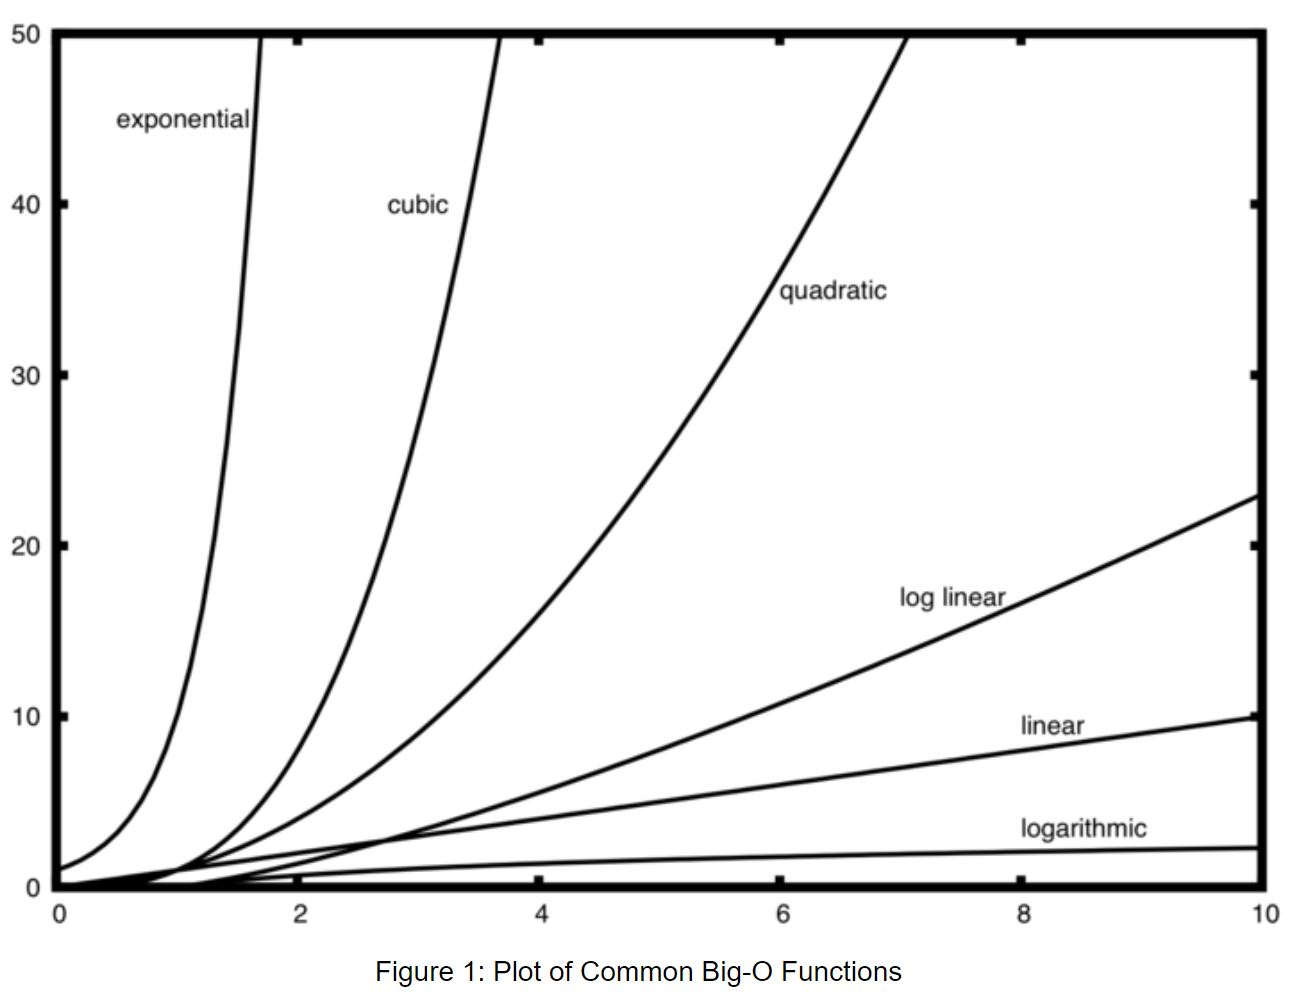


### Summary
* N represents the size of the problem
* The bigger the O(n) value, the longer the growth of run time
* To check O(n)
    * Count the nested loops, esp if nested loops depend on N. Single nested loop is O(n^2)
    * Ask yourself how the problem grows with an increase of 1 for N (how many more iterations need to be done)
    * If the value of i is cut in half each time through the loop it will only take log n iterations.


#### Anagram Problem

<a href=https://runestone.academy/runestone/books/published/pythonds/AlgorithmAnalysis/AnAnagramDetectionExample.html> Big-O Notation for Different Algorithms for an Anagram Checker</a>


<mark>The Final Solution</mark>

"Again, the solution has a number of iterations. However, unlike the first solution, none of them are nested. The first two iterations used to count the characters are both based on n. The third iteration, comparing the two lists of counts, always takes 26 steps since there are 26 possible characters in the strings. Adding it all up gives us T(n)=2n+26 steps. That is O(n). We have found a linear order of magnitude algorithm for solving this problem."

In other words, the run time never changes even as the word gets longer. The **worst case** scenario never changes the run time. 


#### Cheat Sheet of O(n) of operations

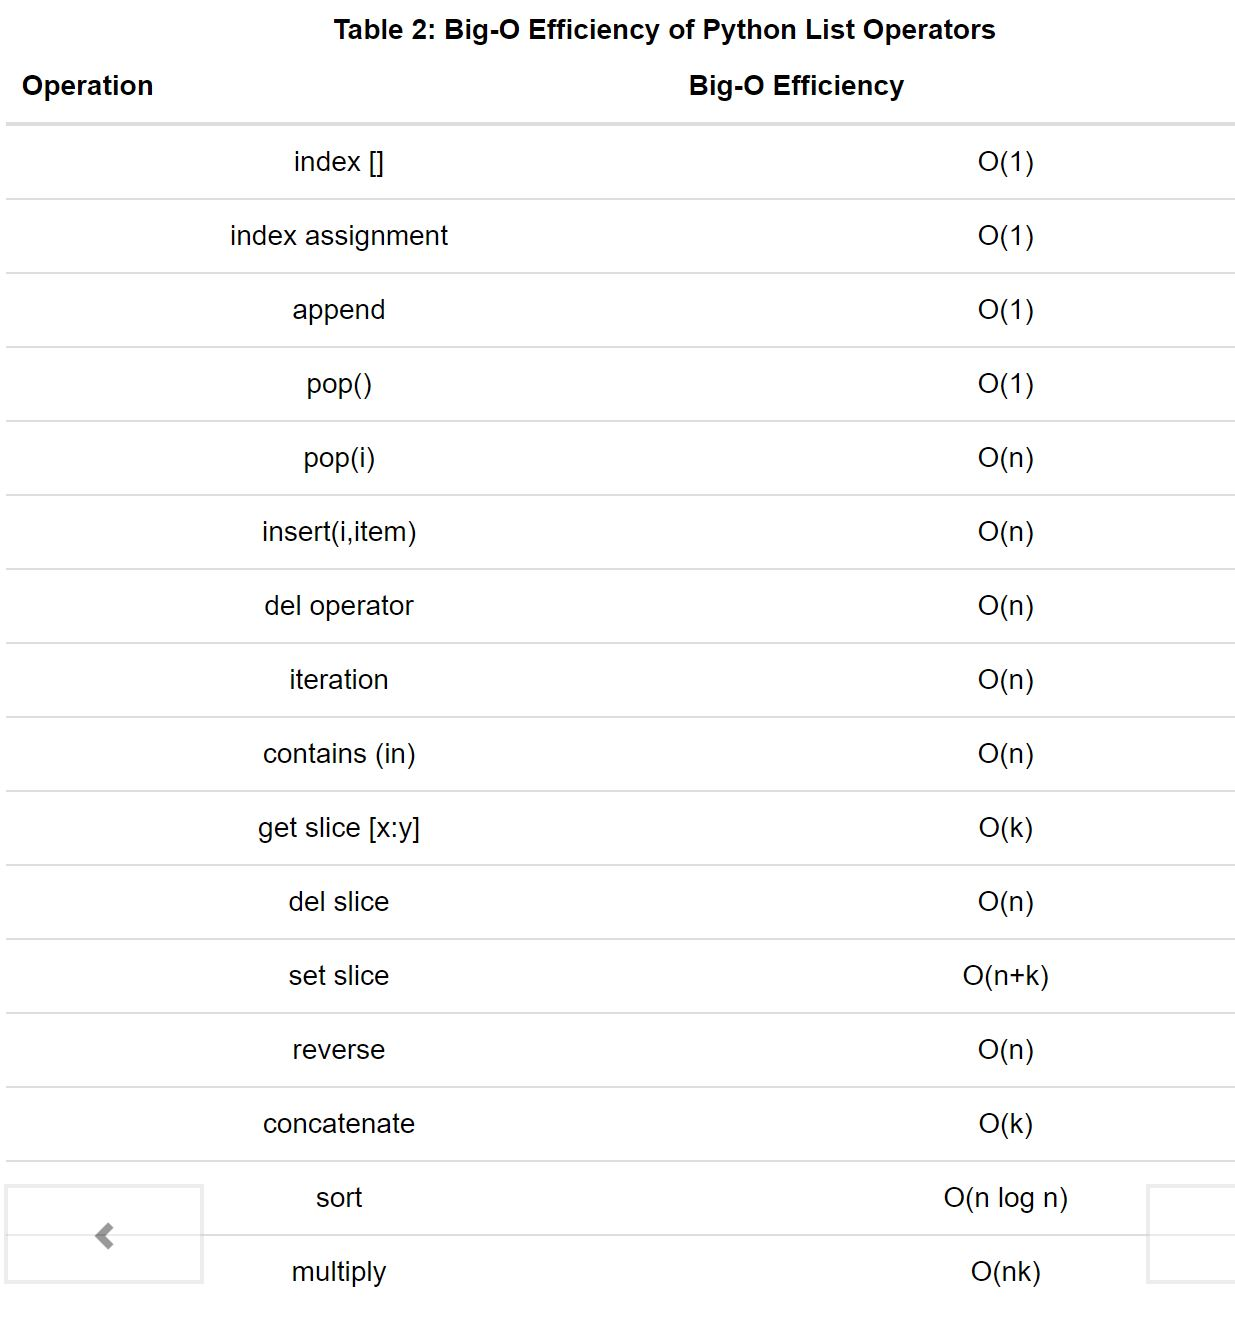


### 3.5 Lists and Dictionaries Operating Time


In [20]:
import timeit

#Adding list items by concatenating existing list l with items from another list [i]
def test1():
    l = []
    for i in range(1000):
        l = l + [i]  
    
#Appending
def test2():
    l = []
    for i in range(1000):
        l.append(i)
        
#List Comprehension: For Loop inside a List
def test3():
    l = [i for i in range(1000)]

#List Constructor Function
def test4():
    l = list(range(1000))
    
#Empty Function for Experimental Purity
def test0():
    pass
    
    
    
#Timing Test- importing tests from __main__ declutters the stray variables/functions for clean timing
#First baseline: overhead time it takes to call an empty function
t0 = timeit.Timer("test0()","from __main__ import test0")
overhead = int(t0.timeit(number=1000))
t1 = timeit.Timer("test1()", "from __main__ import test1")
print("concat: ",t1.timeit(number=1000) - overhead, "milliseconds")
t2 = timeit.Timer("test2()", "from __main__ import test2")
print("append: ",t2.timeit(number=1000) - overhead, "milliseconds")
t3 = timeit.Timer("test3()", "from __main__ import test3")
print("comprehension: ",t3.timeit(number=1000) - overhead, "milliseconds")
t4 = timeit.Timer("test4()", "from __main__ import test4")
print("list range: ",t4.timeit(number=1000) - overhead, "milliseconds")


concat:  4.765215999999782 milliseconds
append:  0.32262719999971523 milliseconds
comprehension:  0.1275946999999178 milliseconds
list range:  0.03649310000037076 milliseconds


### 3.7 Dictionary
Dictionaries differ from lists in that you can access items in a dictionary by a key rather than a position
* Checking to see whether a key is in the dictionary or not is also  O(1
* Get item and set item operations on a dictionary are O(1)

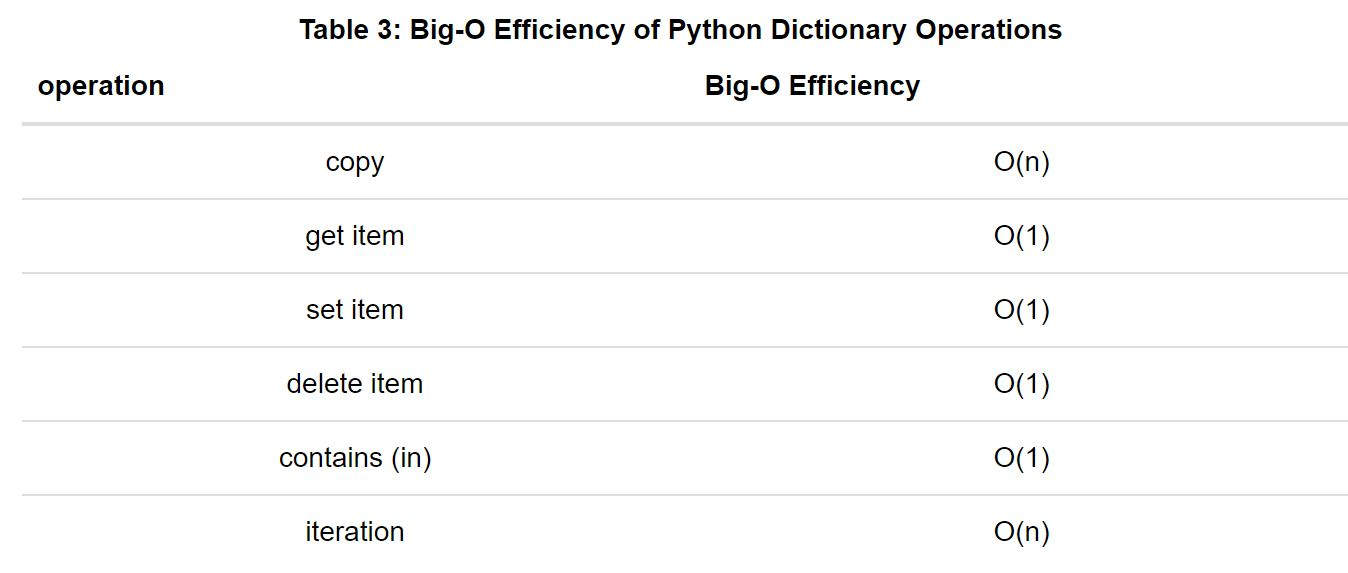


# 4 Data Structure

__Content__
* Stack


Stack: "an ordered collection of items where the addition of new items and the removal of existing
items always takes place at the same end."
* Last in First Out
* Staks are fundamentally important since they reverse the order of items
* i.e. Your browser has a back button to retrieve the last (most recent p
age)

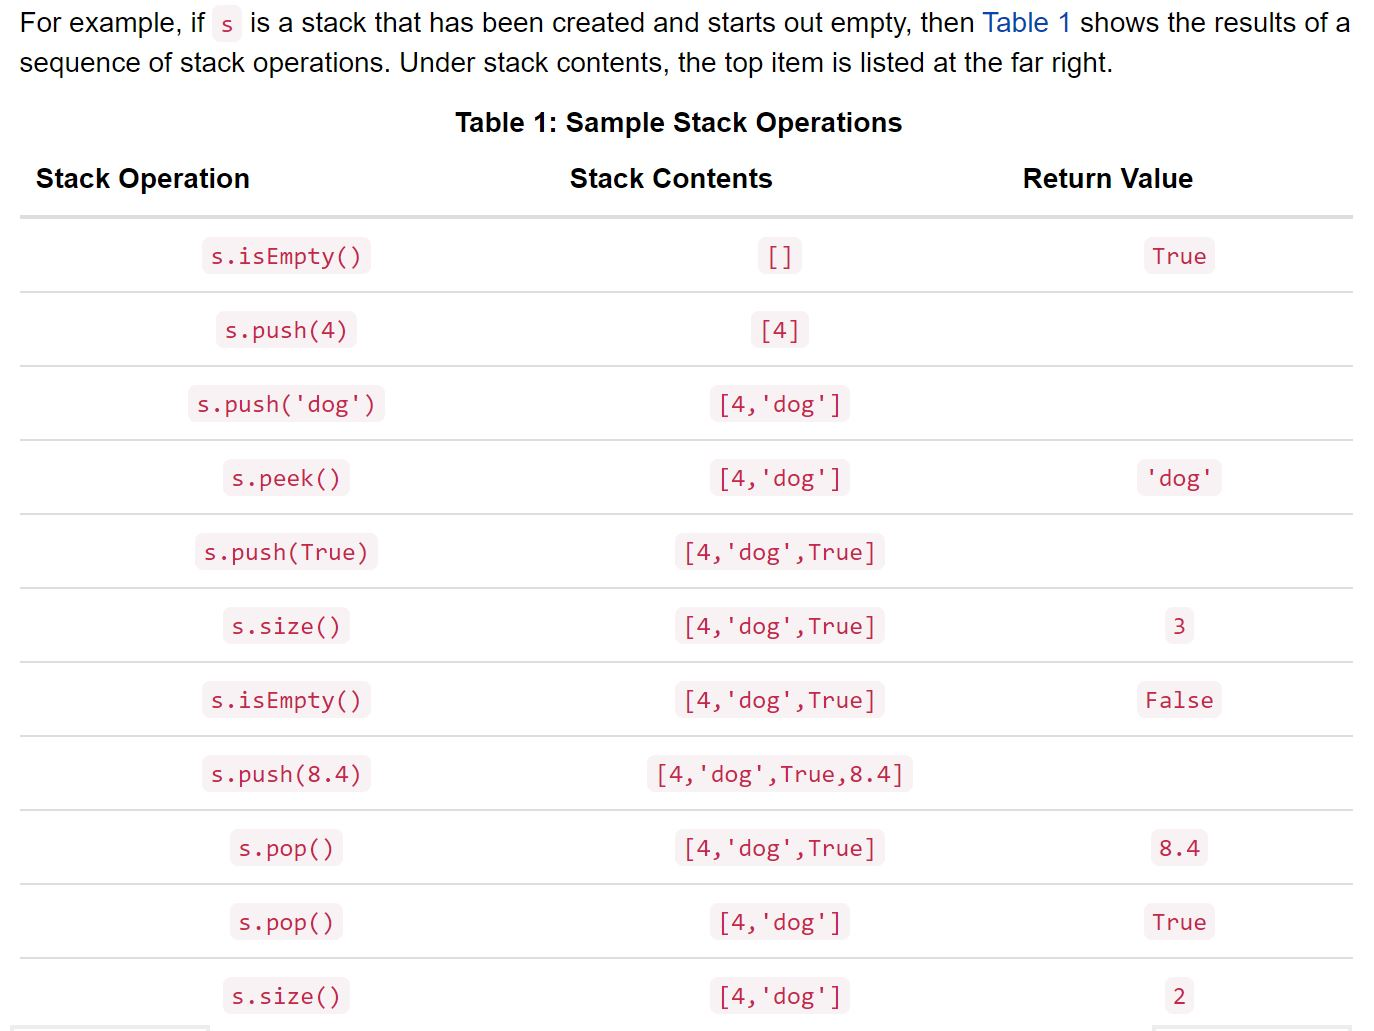



In [2]:
# Example of Implementing a Stack: Simple Parenthesis Balance

# Initializing and Creating Data Structure Class, Stack
class Stack:
     def __init__(self):
         self.items = []

     def isEmpty(self):
         return self.items == []

     def push(self, item):
         self.items.append(item)

     def pop(self):
         return self.items.pop()

     def peek(self):
         return self.items[len(self.items)-1]

     def size(self):
         return len(self.items)


# Parenthesis Checker Function
def parChecker(symbolString):
    s = Stack()
    balanced = True
    index = 0
    while index < len(symbolString) and balanced:
        symbol = symbolString[index]
        if symbol == "(":
            s.push(symbol)
        else:
            if s.isEmpty():
                balanced = False
            else:
                s.pop()

        index = index + 1

    if balanced and s.isEmpty():
        return True
    else:
        return False

print(parChecker('((()))'))
print(parChecker('(()'))

True
False


### Infix, Prefix and Postfix Expressions

Infix: operators in between expressions/operands (i.e. *, +)
    * Infixes have a difference precedence level and () is the only thing that can change that
    * Fully parenthesized expressions leave no room for ambiguity and needs not to remember any precedence rules
    
    
Prefix: A notation that has the operator precede the two operands they work on (i.e. + A * B C) and you perform the functions

Postfix: A notation that has the operators coming after all the corresponding operands (i.e. A B C * +), denoting the sum of A and B*C. Imagine working inside out, with the operation touching performing a function on the two closest variables first.


Prefix and Postfix can do away with parenthesis because the order of operations are completely dictated by the position of the variables and symbols

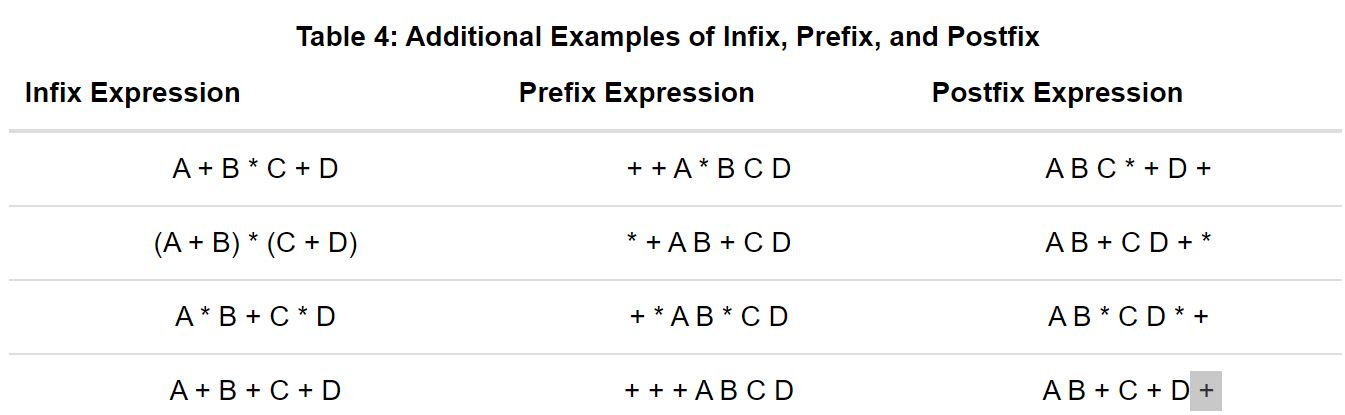


### 4.10 Queue
A __queue__ is an ordered collection of items where the addition of new items happens at one end, called the “rear,” and the removal of existing items occurs at the other end, commonly called the “front.” 

This leads to a First in, First out ordering principle (FIFO)
    * Keyboard functions (each letter must display on the screen in the order we type them in


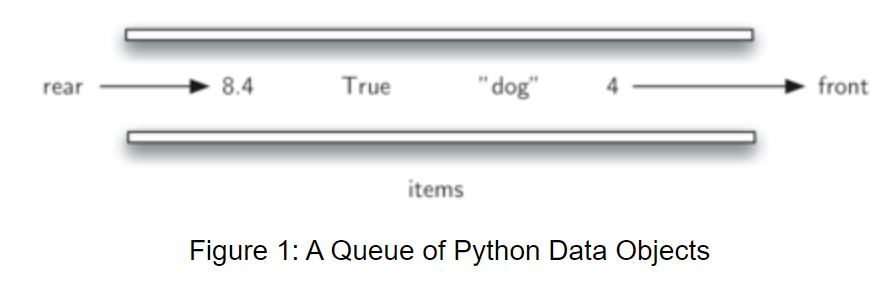


__Queue Abstract Data Type__
* Queue() creates a new queue that is empty. It needs no parameters and returns an empty queue.
* enqueue(item) adds a new item to the rear of the queue. It needs the item and returns nothing.
* dequeue() removes the front item from the queue. It needs no parameters and returns the item. The queue is modified.
* isEmpty() tests to see whether the queue is empty. It needs no parameters and returns a boolean value.
* size() returns the number of items in the queue. It needs no parameters and returns an integer

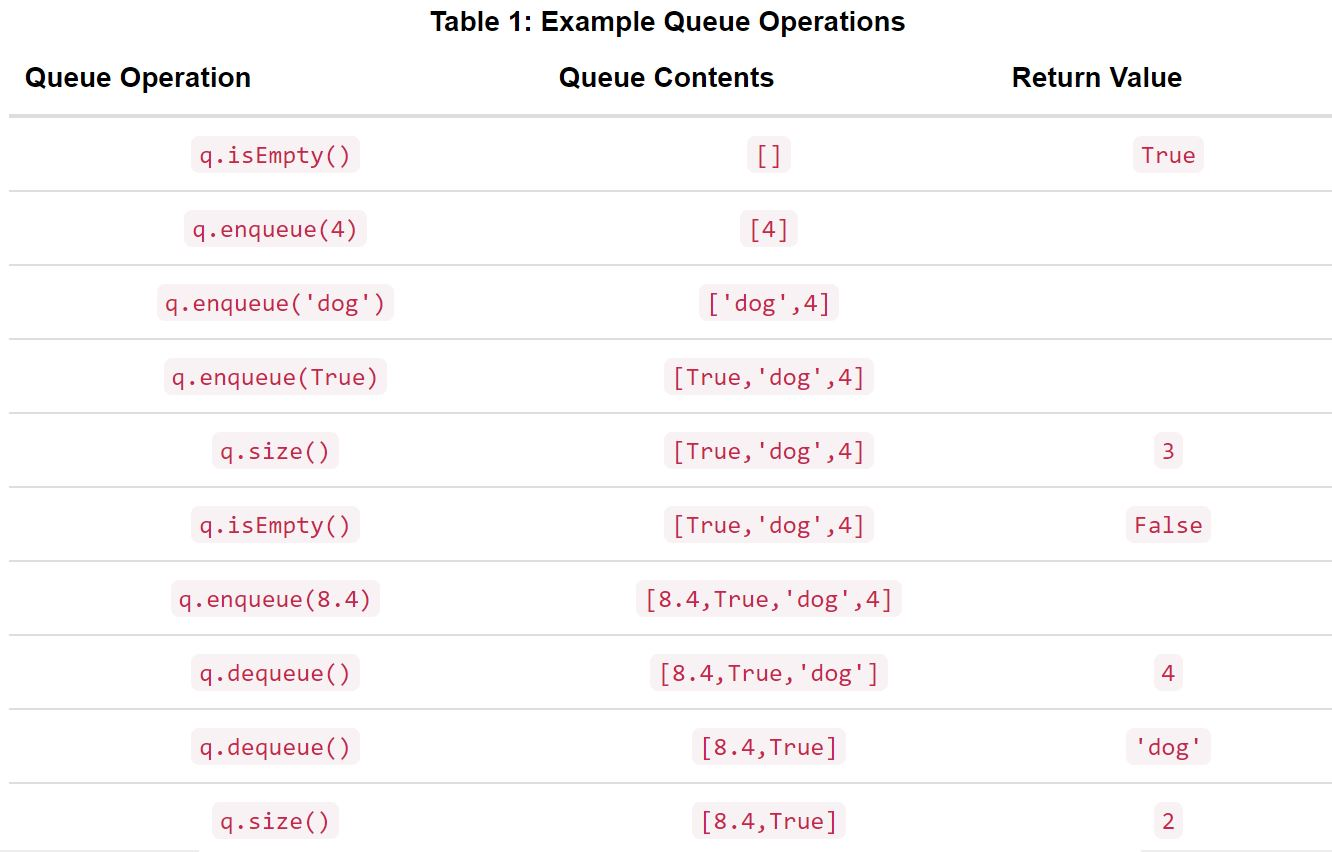


In [6]:
# Implementing a Queue on Python

class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)
    
# A hot potato queue implementation where kids are dequeued from the front, only to be enqueued in the rear for a number of count before the front name is eliminated from the queue altogether

def hotPotato(namelist, num):
    simqueue = Queue()
    for name in namelist:
        simqueue.enqueue(name)

    while simqueue.size() > 1:
        for i in range(num):
            simqueue.enqueue(simqueue.dequeue())

        simqueue.dequeue()

    return simqueue.dequeue()

print(hotPotato(["Bill","David","Susan","Jane","Kent","Brad"],7))


Susan


##### Read Printer Queue Simulation to learn about using Queues to Simulate Real World Problems
<a href="https://runestone.academy/runestone/books/published/pythonds/BasicDS/SimulationPrintingTasks.html"> Printer Queue Simulation </a>
    


### 4.15 Deque
A double-ended queue that by default has a rear and a front but is unrestrictive nature of adding and removing items, and therefore has both the properties of stacks and queues in a single data structure

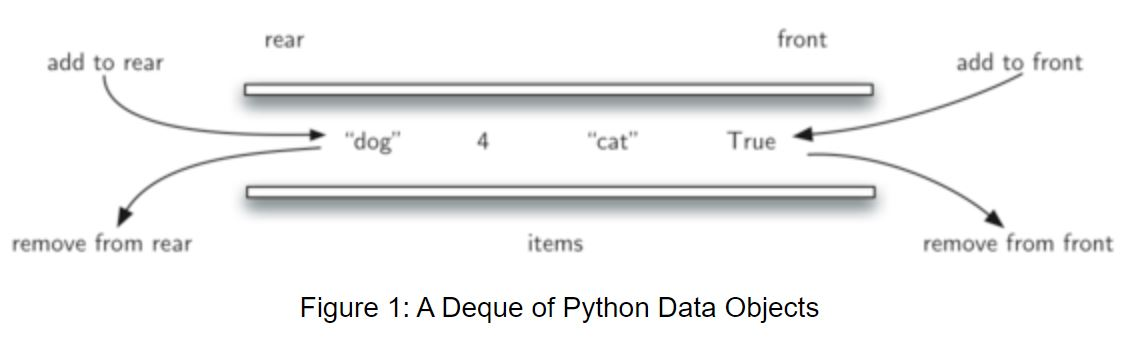

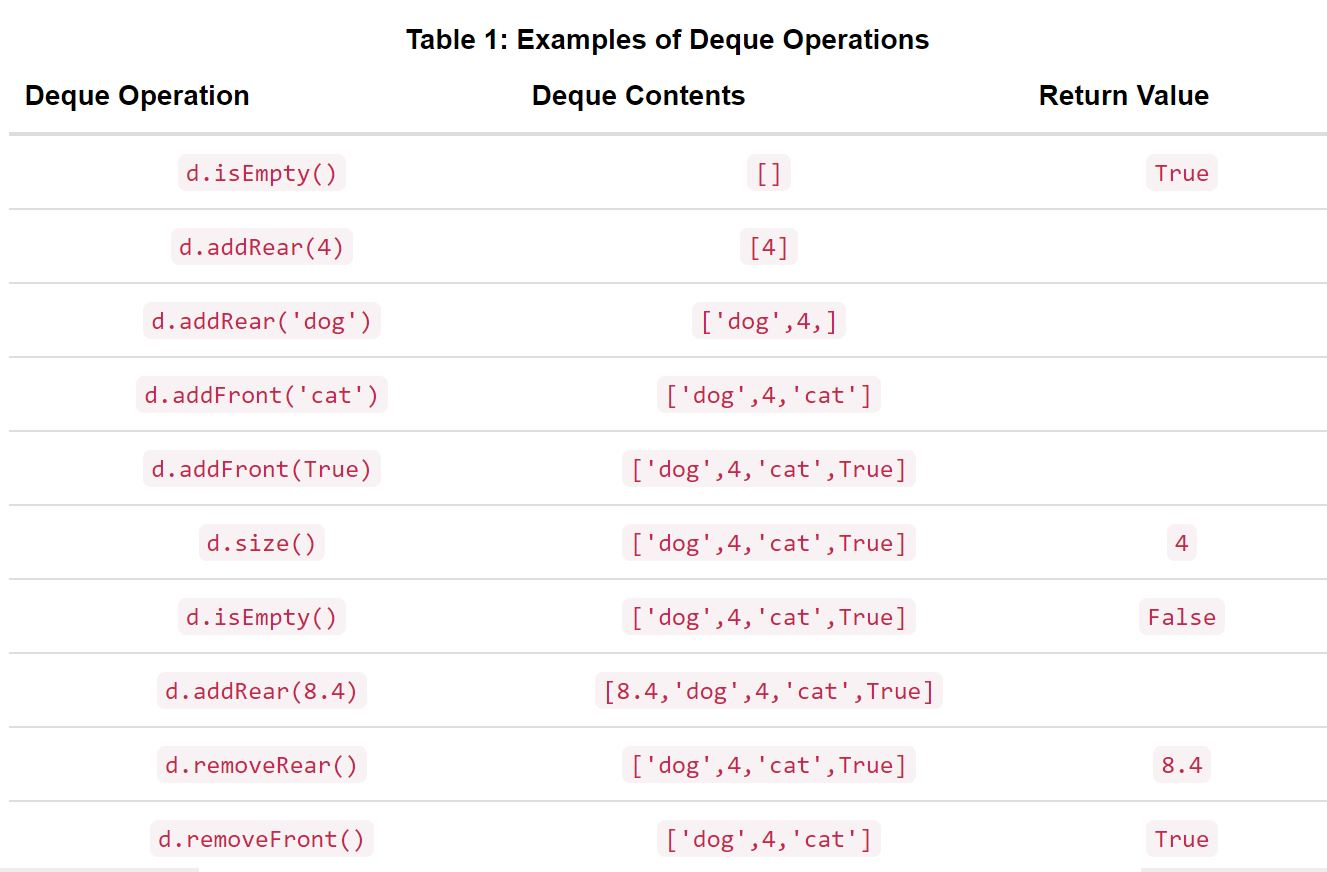

When following the implementation below, you may notice that the implementation of adding and removing items from the front is O(1) whereas adding and removing from the rear is O(n).

In [1]:
# Implementing a Deque

# Define Deque Class
class Deque:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)
    
    
d=Deque()
print(d.isEmpty())
d.addRear(4)
d.addRear('dog')
d.addFront('cat')
d.addFront(True)
print(d.size())
print(d.isEmpty())
d.addRear(8.4)
print(d.removeRear())
print(d.removeFront())

True
4
False
8.4
True


In [2]:
# Palindrome Checker

def palchecker(aString):
    chardeque = Deque()
    
# We will process the string from left to right and we can add each character to the rear of the deque.
    for ch in aString:
        chardeque.addRear(ch)

    stillEqual = True
# However, we can now make use of the dual functionality of the deque by comparing the front and rear characters
    while chardeque.size() > 1 and stillEqual:
        first = chardeque.removeFront()
        last = chardeque.removeRear()
        if first != last:
            stillEqual = False

    return stillEqual

print(palchecker("lsdkjfskf"))
print(palchecker("radar"))



False
True


### 4.19 Lists
A list is an abstract data type that is a collection of items where each item holds a relative position with respect to the others (lists can be unordered or ordered).

Operations include:
    * adding/removing values
    * searching through items/return index number of an item
    * The size of the list/if empty
    * Append and insert items 
    * Pop items by position or by name

Note how you can inswert directly into a specific position


#### 4.20 Linked List
You can maintain the position of items in a list using explicit links. The external reference is the start of the list (head) and each number can contain information about the location of the next item (node)

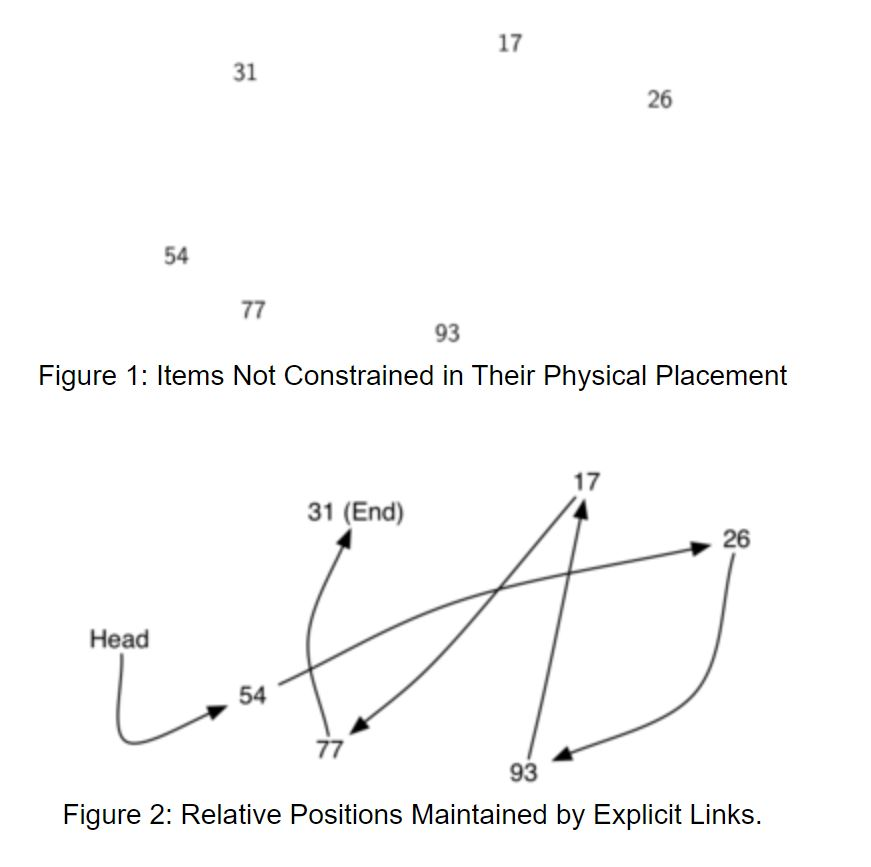

__Nodes__
Each linked list item is a node. And nodes have two pieces of information
    1. The list item itself (The Data Field)
    2. Reference to the next Node
    
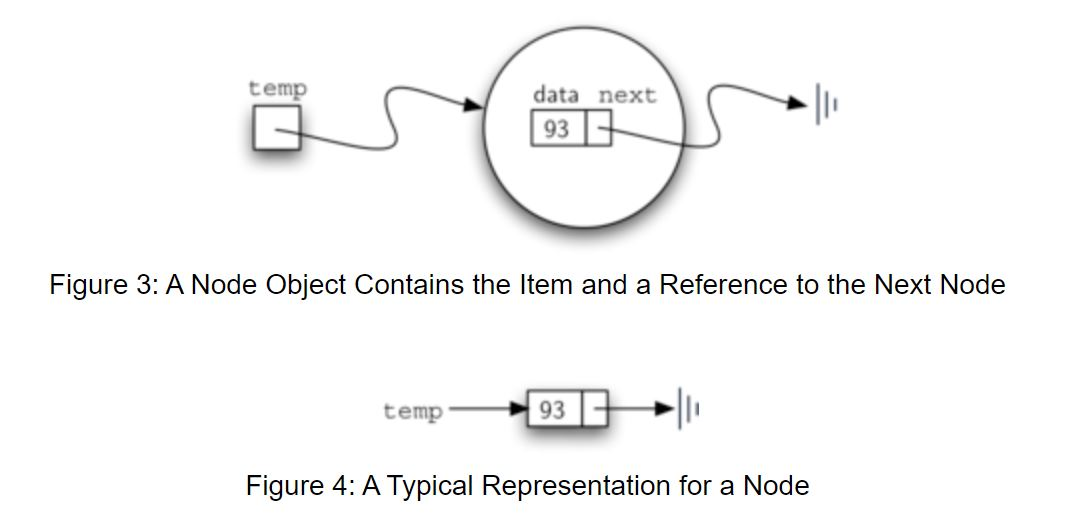

* None reference value indicates the end of the list, though we begin the link by grounding the first node with a None for the next reference value
* Linked list structure provides us with only one entry point, the head of the list. All the other items can be reached from the head and the next links

In [17]:
# Implementing a Linked List

# Define the new Node Class
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext
        
# Creating an Unordered List

class UnorderedList:
    def __init__(self):
        self.head = None
        
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
        
    def isEmpty(self):
        return self.head == None
    
    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count
    
    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.getData() == item:
                found = True
            else:
                current = current.getNext()

        return found
    
    def printList(self):
        current = self.head
        while (current):
            print(current.getData())
            current = current.getNext()
            
    def remove(self,item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.getData() == item:
                found = True
            else:
                previous = current
                current = current.getNext()

        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())

        
mylist = UnorderedList()
mylist.add(31)
mylist.add(32)
mylist.add(33)

mylist.printList()

33
32
31


### Unordered Lists

Step One: Initializes and created the node class object and sets the .setNext method of the new node to the current head of the linked list

Step Two: Resets the head of the list to refer to the newly added item

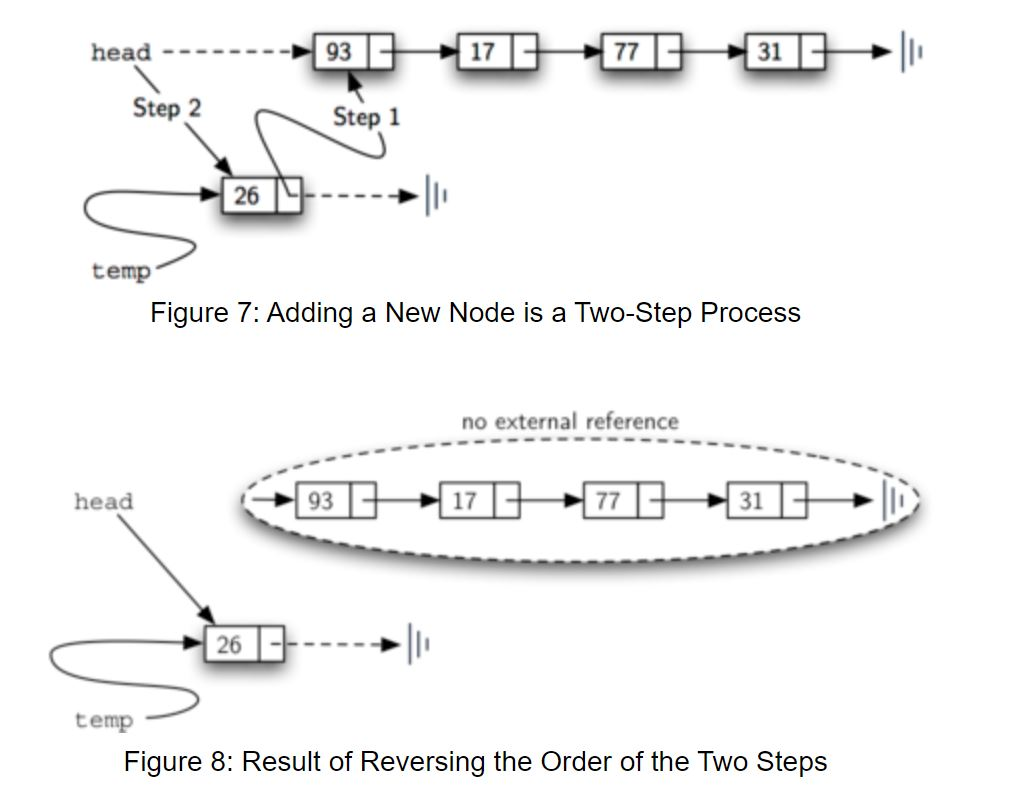


Linked List traversal (i.e. search, size, and remove) is the process of visiting every node.

__Size__
The external reference is called current and is initialized to the head of the list in line 2. At the start of the process we have not seen any nodes so the count is set to 0. Lines 4–6 actually implement the traversal. As long as the current reference has not seen the end of the list (None), we move current along to the next node via the assignment statement in line 6. Again, the ability to compare a reference to None is very useful. Every time current moves to a new node, we add 1 to count. Finally, count gets returned after the iteration stops.

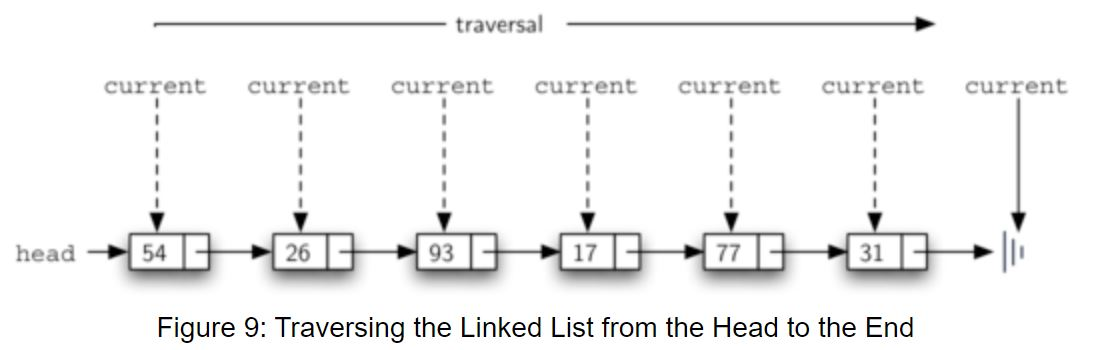

__Remove__
Since nodes cannot move backwards, the solution to this dilemma is to use two external references as we traverse down the linked list. First the pointer, current will behave just as it did before, marking the current location of the traverse. The new reference, which we will call previous, will always travel one node behind current. That way, when current stops at the node to be removed, previous will be referring to the proper place in the linked list for the modification.

Previous, however, is assumed to always travel one node behind current. For this reason, previous starts out with a value of None since there is no node before the head (see Figure 11). The boolean variable found will again be used to control the iteration. As current travels down a node and misses its search, previous will take its place before current moves to the next node. When current find the node, then previous will not take current's place and remain on the node before current. Then previous.setNext (the node's next reference) is changed to current's current next reference essentially skipping over this node, joining previous with the node after current.

The if previous == None refers to when you happen to remove the first node in a linked list.

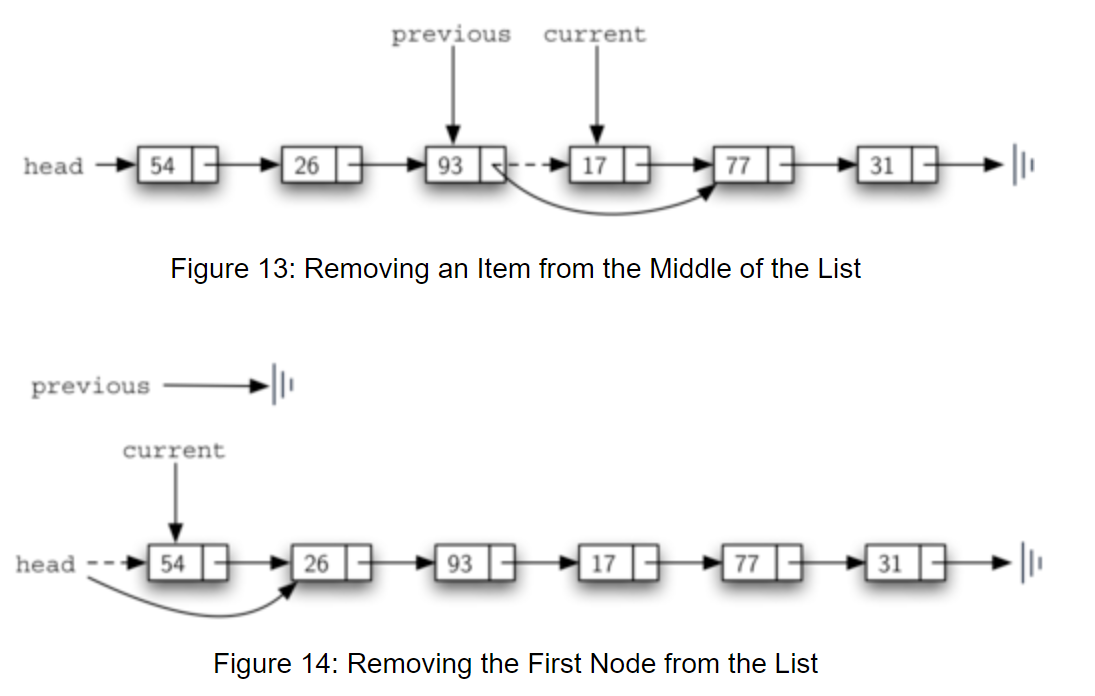

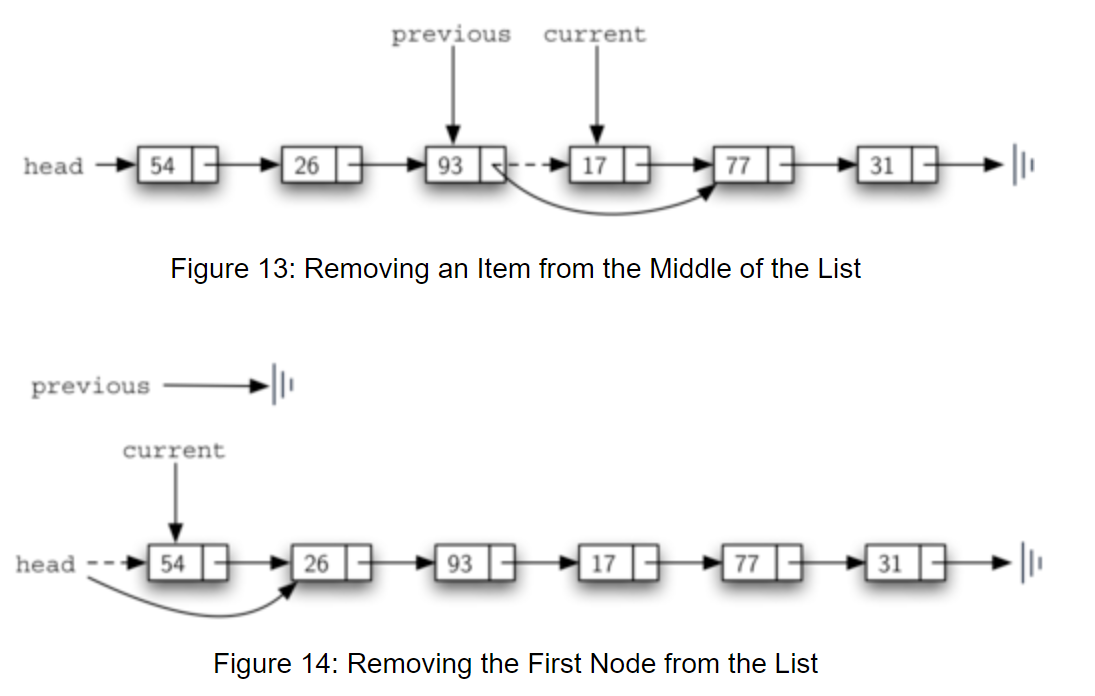

# 5.2 Recursion

Recursion is a method of solving problems that involves breaking a problem down into smaller and smaller subproblems until you get to a small enough problem that it can be solved trivially. Usually recursion involves a function calling itself. While it may not seem like much on the surface, recursion allows us to write elegant solutions to problems that may otherwise be very difficult to program

In [1]:
# Addition with recursion instead of using for/while loops

def listsum(numList):
   if len(numList) == 1:
        return numList[0]

   else: # This function strips the first item of the list until you get a large addition expression of individual integers
        return numList[0] + listsum(numList[1:])

print(listsum([1,3,5,7,9]))


25


When we reach the point where the problem is as simple as it can get, we begin to piece together the solutions of each of the small problems until the initial problem is solved. Figure 2 shows the additions that are performed as listsum works its way backward through the series of calls

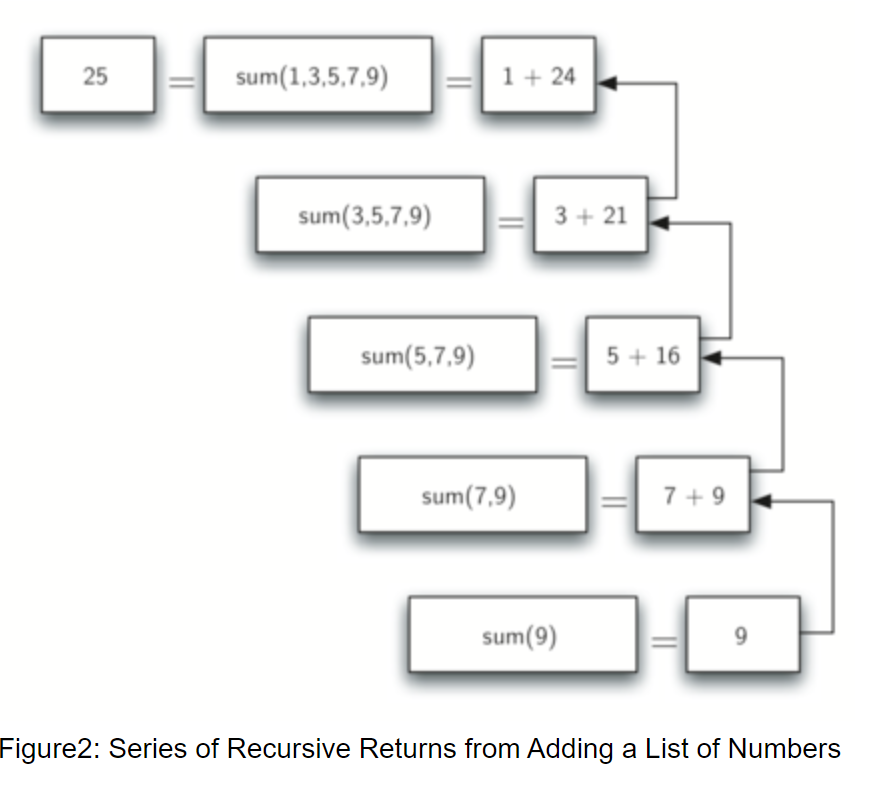

Going backwards, recursion adds up all the function in the reverse order that they were called in

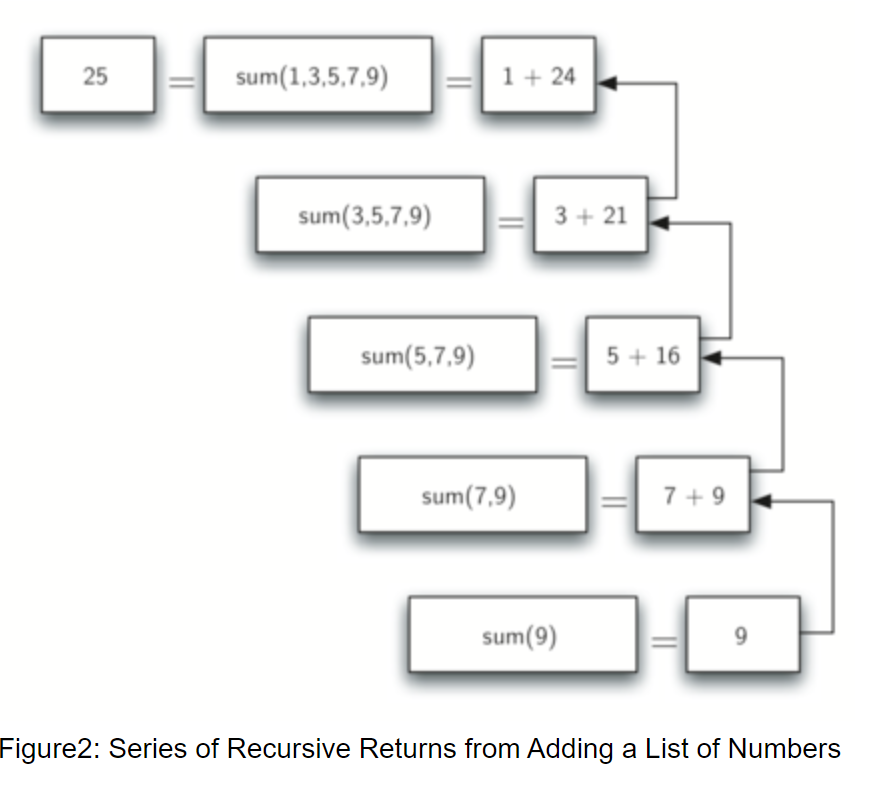


__base case__: A list of length 1 (the problem is smalll enough to solve directly so recursion can stop)
__recursion__: Shortening the list with each iteration making the problem smaler
__calls itself__: Each iteration called a smaller problem



### The Three Laws of Recursion
1. A recursive algorithm must have a base case
2. A recursive algorithm must change its state and move toward the base case
3. A recursive algorithm must call itself recursively



In [12]:
#Converting an Integer into a String to Any Base

def toStr(n,base):
   convertString = "0123456789ABCDEF" # Base Case: Convert the single digit-number to a string using a lookup.
   if n < base:
      return convertString[n] # Reduce the original number to a series of single-digit numbers.
   else:
      return toStr(n//base,base) + convertString[n%base] # Concatenate the single-digit strings together to form the final result

print(toStr(1453,16))

# Internal Regression Work

# toStr(90) + "13"
# toStr(5) + '10' + '13'
# '5' + 'A' + 'D'

# The stack frames also provide a scope for the variables used by the function. Even though we are calling the same function over and over, each call creates a new scope for the variables that are local to the function.



5AD


'\ntoStr(90) + "13"\n\ntoStr(5) + \'10\' + \'13\'\n\n\'5\' + \'A\' + \'D\'\n\n'

#### Thinking about toStr in terms of Stacks

A stack frame is allocated to handle the local variables of the function. When the function returns, the return value is left on top of the stack for the calling function to access. Figure 6 illustrates the call stack after the return statement on line 4.

The code above can be reinterpreted by the stack framework:
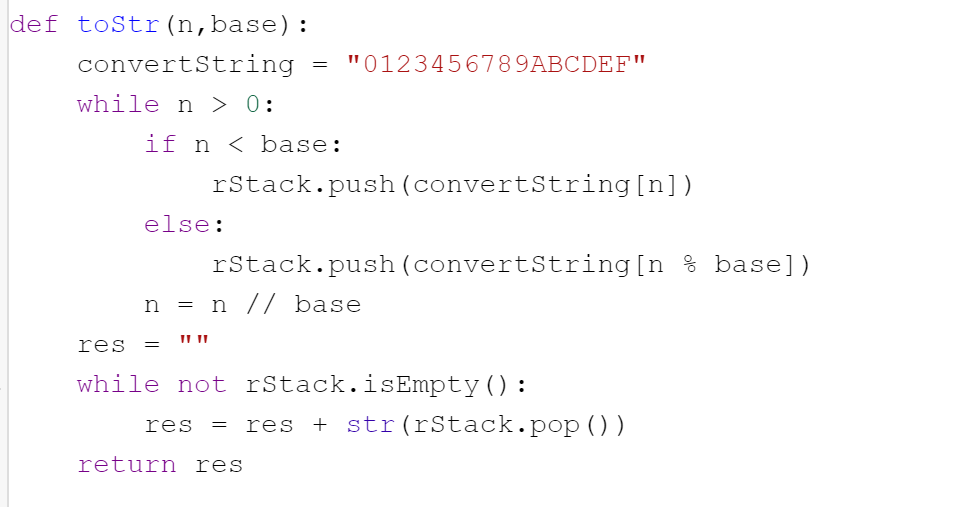


Visualization
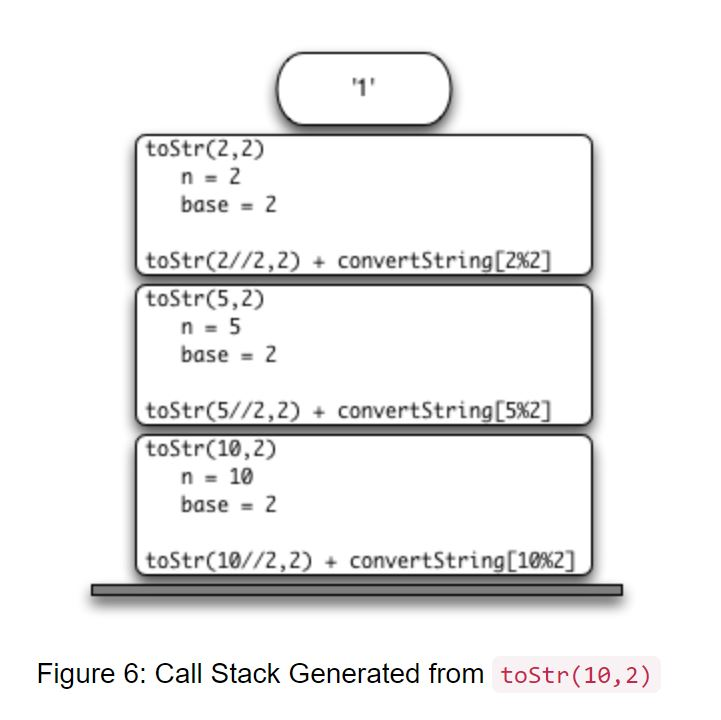

#### 5.8 Fractals

__Sierpinski Triangle__

Is a visual representation of a recurisive function. The procedure for drawing a Sierpinski triangle by hand is simple. Start with a single large triangle. Divide this large triangle into four new triangles by connecting the midpoint of each side. Ignoring the middle triangle that you just created, apply the same procedure to each of the three corner triangles. Each time you create a new set of triangles, you recursively apply this procedure to the three smaller corner triangles

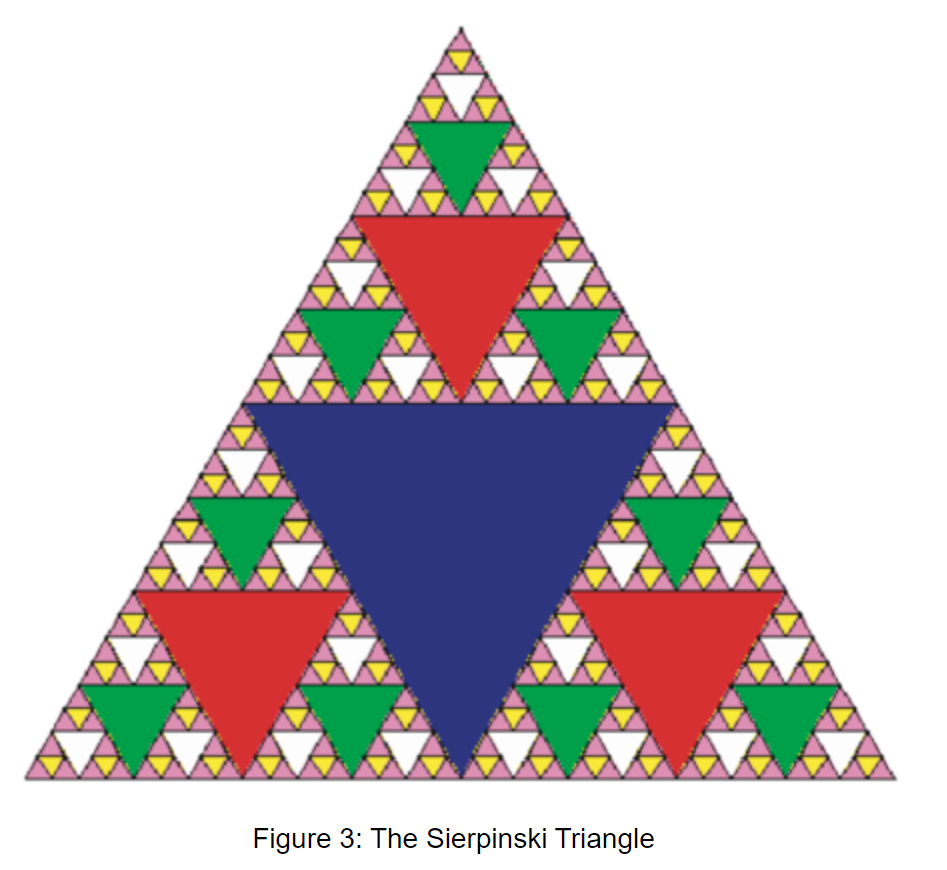

The base case is set arbitrarily as the number of times we want to divide the triangle into pieces. Sometimes we call this number the `“degree” of the fractal.`


Recursive algorithm can also be seen as a diagram of function calls. the recursive calls are always made going to the left. The active functions are outlined in black, and the inactive function calls are in gray. The farther you go toward the bottom of Figure 4, the smaller the triangles. The function finishes drawing one level at a time; once it is finished with the bottom left it moves to the bottom middle, and so on.

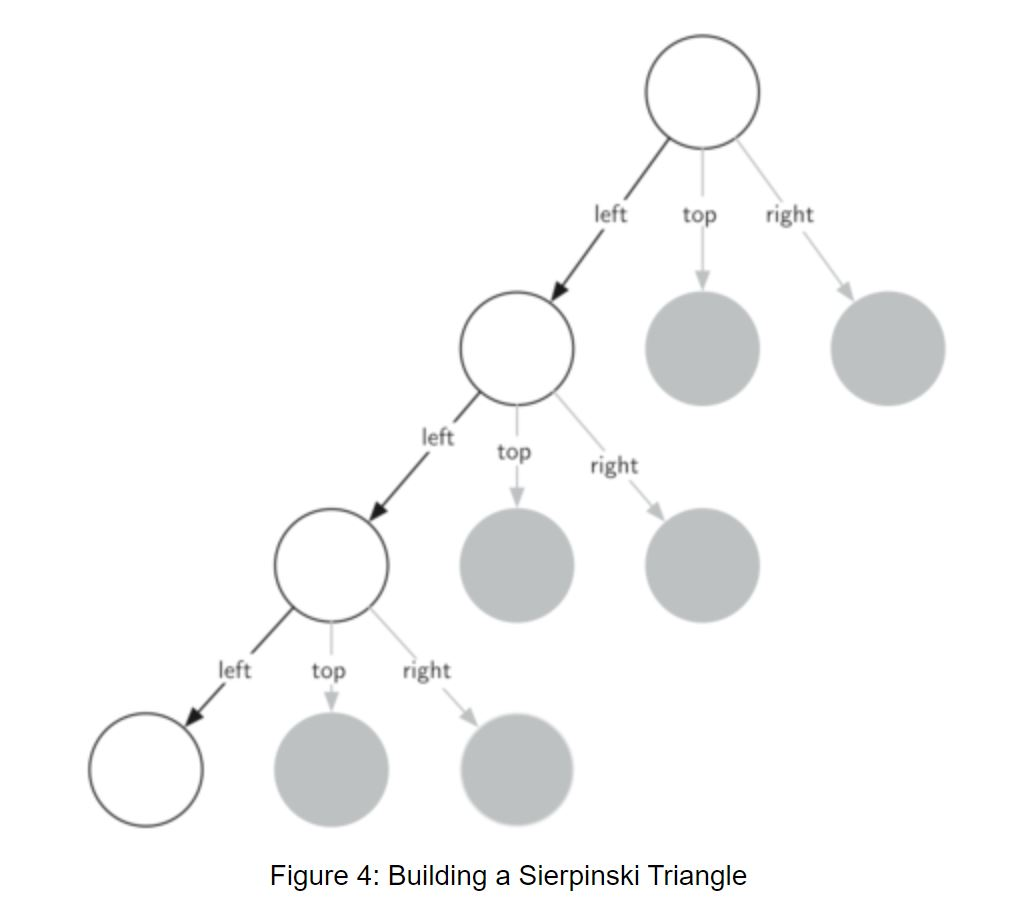



### 5.12 Dynamic Programming
Dynamic programming solves problems regarding optimization using computer science

__Greedy Method__ Solving the biggest problem first

It is important to realize that just because you can write a recursive solution to a problem does not mean it is the best or most efficient solution. 

## Summary
* All recursive algorithms must have a base case
* A recursive algorithm must change its state and make progress toward the base case
* A recursive algorithm must call itself (recursively)
* Recursion can take the place of iteration in some cases
* Recursive algorithms often map very naturally to a formal expression of the problem you are trying to solve
* Recursion is not always the answer

In [6]:
# Change needed given different coin denominators

def dpMakeChange(coinValueList,change,minCoins,coinsUsed):
   for cents in range(change+1):
      coinCount = cents
      newCoin = 1
      for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents-j] + 1 < coinCount:
               coinCount = minCoins[cents-j]+1
               newCoin = j
      minCoins[cents] = coinCount
      coinsUsed[cents] = newCoin
   return minCoins[change]

def printCoins(coinsUsed,change):
   coin = change
   while coin > 0:
      thisCoin = coinsUsed[coin]
      print(thisCoin)
      coin = coin - thisCoin

def main():
    amnt = 63
    clist = [1,5,10,21,25]
    coinsUsed = [0]*(amnt+1)
    coinCount = [0]*(amnt+1)

    print("Making change for",amnt,"requires")
    print(dpMakeChange(clist,amnt,coinCount,coinsUsed),"coins")
    print("They are:")
    printCoins(coinsUsed,amnt)
    print("The used list is as follows:")
    print(coinsUsed)

main()

Making change for 63 requires
3 coins
They are:
21
21
21
The used list is as follows:
[1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 1, 1, 1, 1, 5, 1, 1, 1, 1, 10, 21, 1, 1, 1, 25, 1, 1, 1, 1, 5, 10, 1, 1, 1, 10, 1, 1, 1, 1, 5, 10, 21, 1, 1, 10, 21, 1, 1, 1, 25, 1, 10, 1, 1, 5, 10, 1, 1, 1, 10, 1, 10, 21]


# 6. Search
In Python there's a simple search function (in): 

> 15 in [3,5,2,4,1]  
False   
3 in [3,5,2,4,1]   
True  



But there are many different ways to search for the item:
__The Sequential Search__: Looking through each item on a randomly ordered list
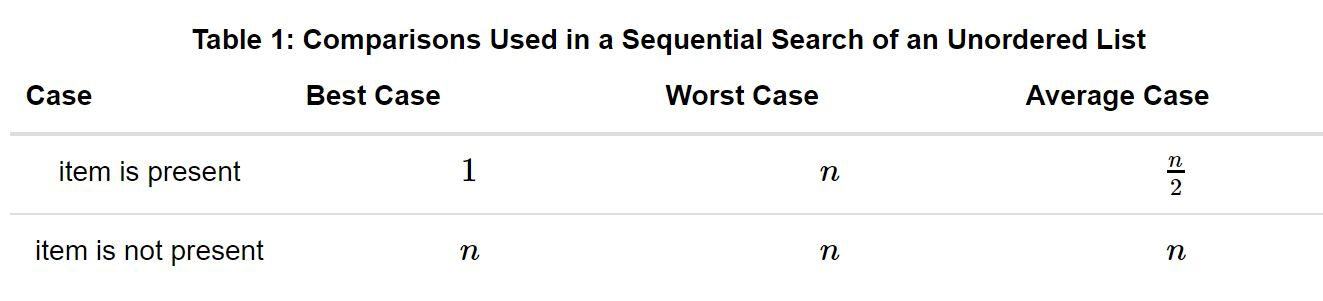

However if you sort the list, there's an advantage in search if the item is not in the list. Specifically, an ordered list improves sequential search in the case where we the item is not in the list

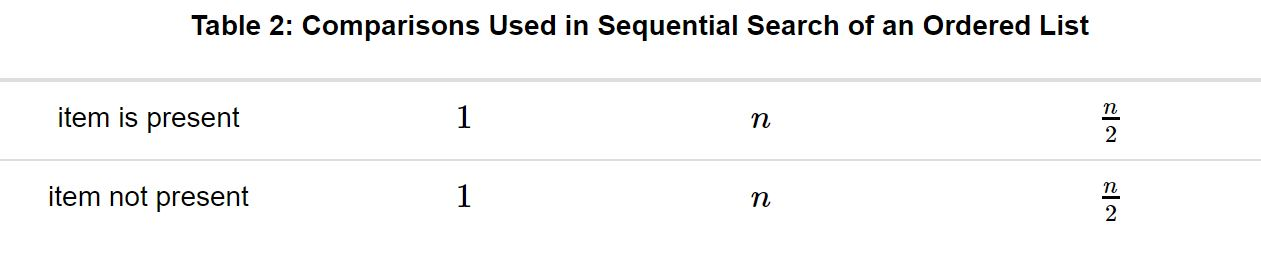

In [4]:
# Sequential Search
def sequentialSearch(alist, item):
    pos = 0
    found = False
    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else:
            pos = pos+1
    return found

testlist = [1, 2, 32, 8, 17, 19, 42, 13, 0]
print(sequentialSearch(testlist, 3))
print(sequentialSearch(testlist, 13))

False
True


### Binary Search
After ordering the list, you start by examining the middle item. If it's the item we're searching for, we're done, if not, we eliminate one of the split halves of the list to search through. Then repeat the process in the remaining half.

This implementation is a great example of a divide and conquer strategy. Divide the problem into smaller pieces, solve the smaller pieces and then reassemble the whole problem to get the result (you can implement a recursive version of this solution)

Even though a binary search is generally better than a sequential search, it is important to note that for small values of n, the additional cost of sorting is probably not worth it.

__Analysis__
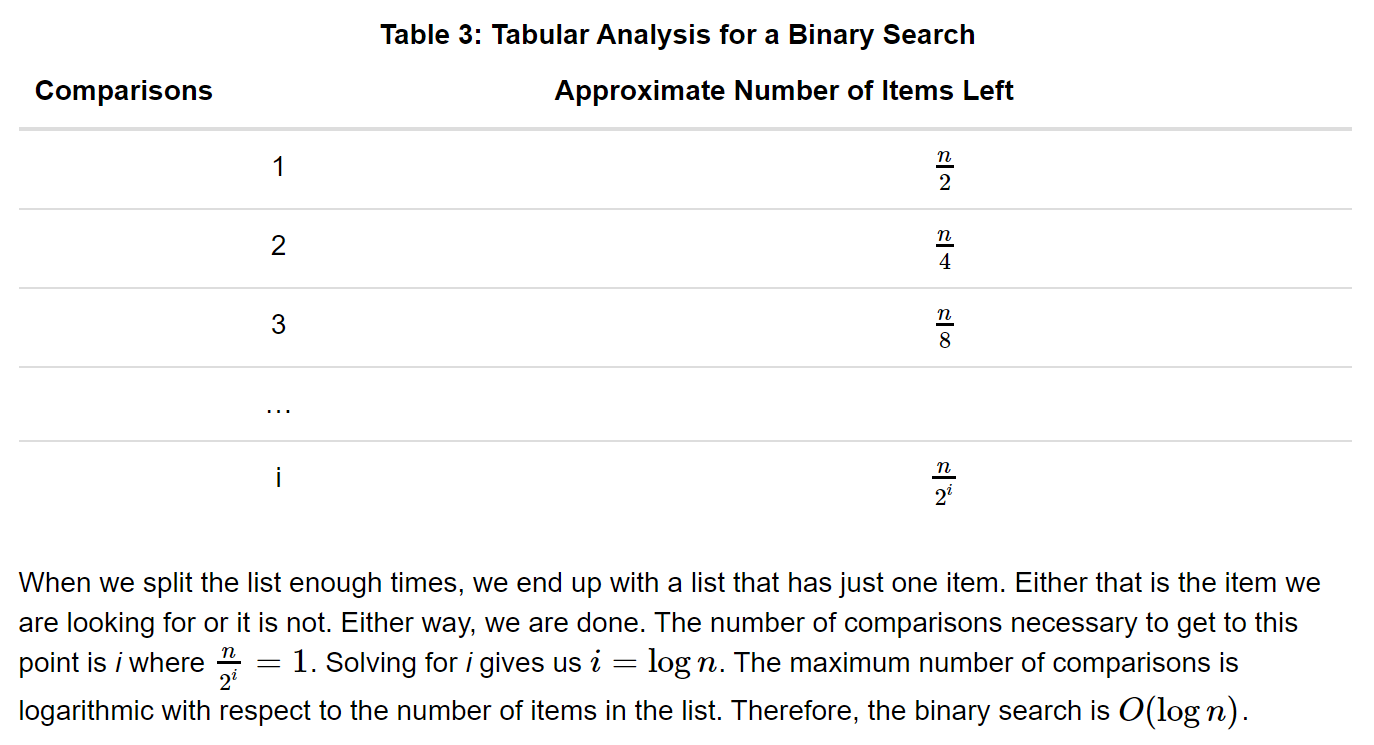

In [9]:
# Binary Search Implementation Non-Recursion

def binarySearch(alist, item):
    first = 0
    last = len(alist)-1
    found = False
    
    while first <= last and not found:
        midpoint = (first + last)//2
        if alist[midpoint] == item:
            found = True
            
        else:
            if item < alist[midpoint]:
                last = midpoint -1
            else:
                first = midpoint+1
    return found


testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))
print()


# Binary Search Recursive Implementation
def rbinarySearch(alist, item):
    if len(alist) == 0:
        return False
    else:
        midpoint = len(alist)//2
        if alist[midpoint]==item:
            return True
        else:
            if item<alist[midpoint]:
                return rbinarySearch(alist[:midpoint],item) #Implementing a slice operator
            else:
                return rbinarySearch(alist[midpoint+1:],item)

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
print(rbinarySearch(testlist, 3))
print(rbinarySearch(testlist, 13))

False
True

False
True


### Hashing
Goal: Creating a data structure that can be searched in O(1) time. To do so, we want to create a hash table where each item of a list is sorted into a specific slot of their own. Such that you need to only check that slot to see if the item is there. 

__Hash Function__: A function performed on the raw data to convert it into a slot. i.e. the "remainder method" takes an item and divides it by the table size and returns the remainder as its hash value

__Hash Collision__: Because the point is to have one item in each slot, you don't want multiple items in one hash value slot. A perfect hash function has no hash collisions.


Objective: create a hash function that...
* Minimizes the number of collisions
* Is easy to compute
* Evenly distributes the items in the hash table
* Efficient so it does not become a dominant part of the storage and search process

i.e. Mid-Square method, Folding Method, Ordinal values (ASCII for alphabets)


In [15]:
# Hashing a string using ordinal (unicode integers) values for each letter and then % the sum

def hash(astring, tablesize):
    sum = 0
    for pos in range(len(astring)):
        sum = sum + ord(astring[pos])
    print(sum)

    return sum%tablesize


slot = str(hash("cat", 11))
print("In this example, the string 'cat' is hashed at the value " + slot)

312
In this example, the string 'cat' is hashed at the value 4


### Collisions Resolution

`Linear Probing`  
__Open Addressing__: When an item is hashed into a slot that's already occupied, move that item into the next available slot.

Such that when a collided item get searched for, the function will implement __linear probing__ to sequentially look for the value in the subsequent slots until it hits an empty slot

Disadvantage to open addressing is the __clustering__ of items in tables which causes a number of surrounding slots to be filled by linear probing resolutions
    * To reduce clustering, you can skip slots when resolving collisions (aka __rehashing__)
    * You could use a constant skip value for a more distributed hash table, or you can use __quadratic probing__ which rehashes functions that increments in different increments rehash(pos)=(h+i2)
    
    
`Chaining`  
Allow each slot to hold a reference to a collection (chain) of items. Implementing a linked list within each hash can save some hash slots space.


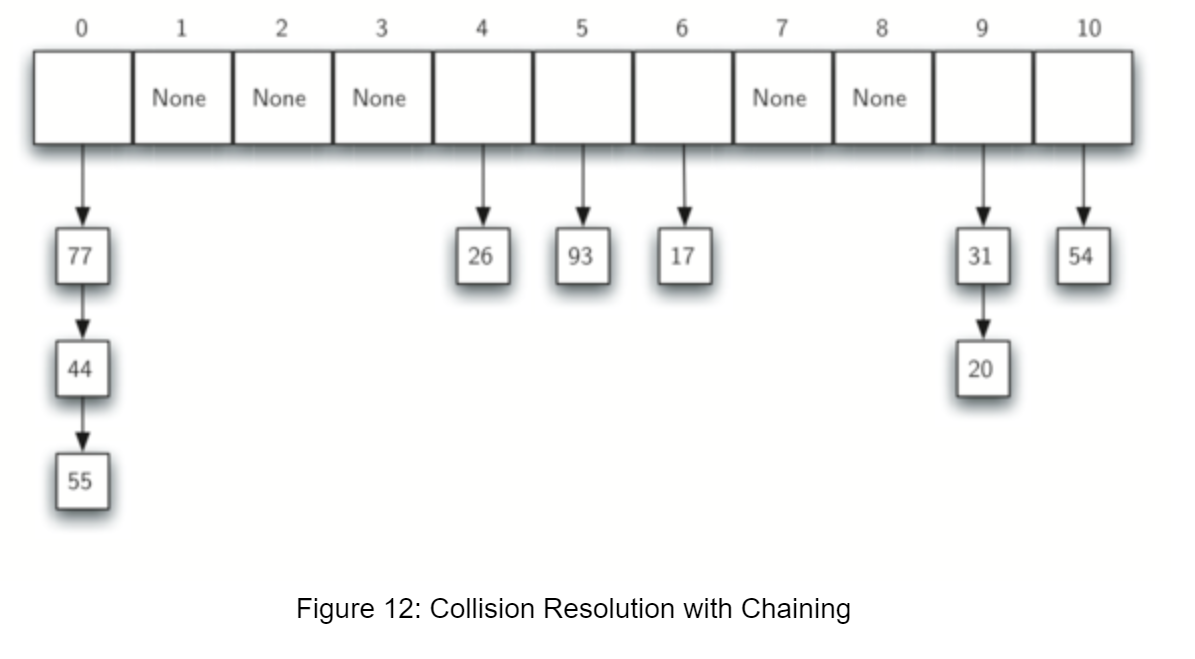

### Mapping
A dictionary has a key-data pair , and the key is used to look up the associated data value. This is a __map__ ✌

Dictionaries allow for a quick look up capabilities. In Listing 2 we use two lists to create a HashTable class that implements the Map abstract data type. 
* One list, called slots, will hold the key items 
* A parallel list, called data, will hold the data values 

When we look up a key, the corresponding position in the data list will hold the associated data value (aka the two items are linked by list position). We will treat the slots list as a hash table. 

Note that the initial size for the hash table has been chosen to be 11. Although this is arbitrary, it is important that the size be a prime number so that the collision resolution algorithm can be as efficient as possible


In [27]:
# Implementing a map and a hash function

class HashTable:
    def __init__(self):
        self.size =  11
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
def put(self,key,data):
    hashvalue = self.hashfunction(key,len(self.slots))

    if self.slots[hashvalue] == None:
        self.slots[hashvalue] = key
        self.data[hashvalue] = data
    else:
        if self.slots[hashvalue] == key:
            self.data[hashvalue] = data  #replace
        else:
            nextslot = self.rehash(hashvalue,len(self.slots))
            while self.slots[nextslot] != None and \
                    self.slots[nextslot] != key:
                nextslot = self.rehash(nextslot,len(self.slots))

        if self.slots[nextslot] == None:
            self.slots[nextslot]=key
            self.data[nextslot]=data
        else:
            self.data[nextslot] = data #replace

def hashfunction(self,key,size):
     return key%size

def rehash(self,oldhash,size):
    return (oldhash+1)%size



def put(self,key,data):
    hashvalue = self.hashfunction(key,len(self.slots))

    if self.slots[hashvalue] == None:
        self.slots[hashvalue] = key
        self.data[hashvalue] = data
    else:
        if self.slots[hashvalue] == key:
            self.data[hashvalue] = data  #replace
        else:
            nextslot = self.rehash(hashvalue,len(self.slots))
            while self.slots[nextslot] != None and \
                      self.slots[nextslot] != key:
                nextslot = self.rehash(nextslot,len(self.slots))

    if self.slots[nextslot] == None:
        self.slots[nextslot]=key
        self.data[nextslot]=data
    else:
        self.data[nextslot] = data #replace

def hashfunction(self,key,size):
     return key%size

def rehash(self,oldhash,size):
    return (oldhash+1)%size




def get(self,key):
    startslot = self.hashfunction(key,len(self.slots))

    data = None
    stop = False
    found = False
    position = startslot
    while self.slots[position] != None and  \
                       not found and not stop:
        if self.slots[position] == key:
            found = True
            data = self.data[position]
        else:
            position=self.rehash(position,len(self.slots))
            if position == startslot:
                stop = True
    return data

def __getitem__(self,key):
    return self.get(key)

def __setitem__(self,key,data):
    self.put(key,data)


    
# Create a Hash Table and store some items with integer keys and string data values
# H=HashTable()
# H[54]="cat"
# H[26]="dog"
# H[93]="lion"
# H[17]="tiger"
# H[77]="bird"
# H[31]="cow"
# H[44]="goat"
# H[55]="pig"
# H[20]="chicken"

print(H.slots)
print(H.data)


[None, None, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, None, None]


`Implementation Documentation`

__hashfunction & rehash__
1. hashfunction implements the simple remainder method. 
2. The collision resolution technique is linear probing with a “plus 1” rehash function.
3. The put function assumes that there will eventually be an empty slot unless the key is already present in the self.slots
4. It computes the original hash value and if that slot is not empty, iterates the rehash function until an empty slot occurs.
5. If a nonempty slot already contains the key, the old data value is replaced with the new data value.


__get__
1. Begins by computing the initial hash value
2. If the value is not in the initial slot, rehash is used to locate the next possible position
3. Notice that line 15 guarantees that the search will terminate by checking to make sure that we have not returned to the initial slot. If that happens, we have exhausted all possible slots and the item must not be present

__hashtable__
1. class provide additional dictionary functionality.



### Analysis of Hash Functions
If there is a high load factor, λ , then we can expect more hash collisions, and more difficult collision resolution (i.e. chaining or linear probing)

Without any collisions, O(n) is 1, with collisions and as a function of λ: 

> 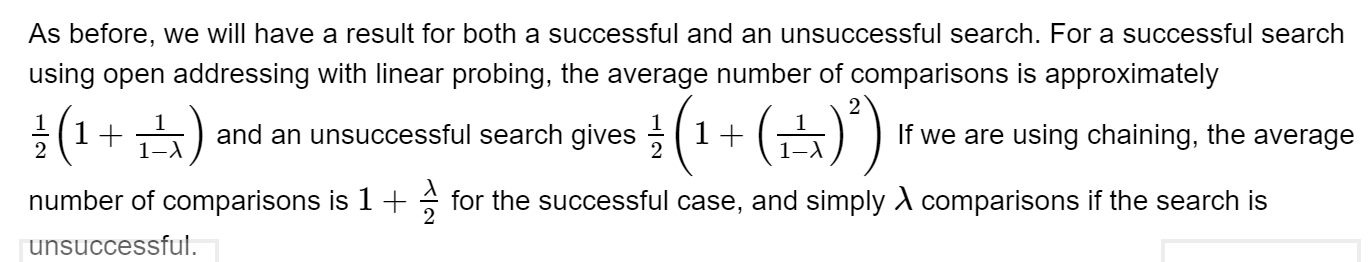

# 6.6 Sorting


### Bubble Sort
The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.

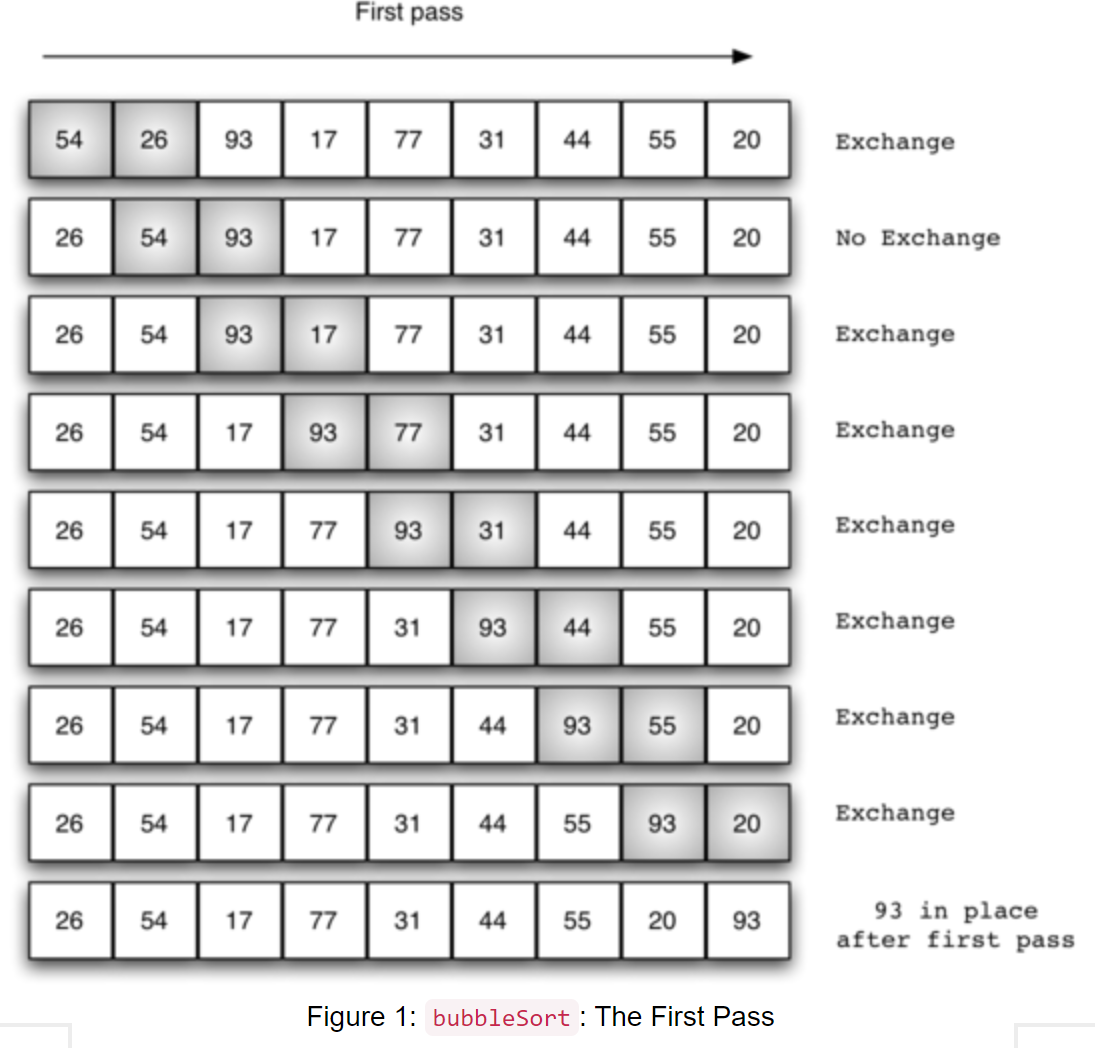

Since each pass places the next largest value in place, the total number of passes necessary will be n−1  

The swap operation often requires a temporary storage location  

In Python, it is possible to perform simultaneous assignment. The statement a,b=b,a will result in two assignment statements being done at the same time

Bubble sort is a O(n<sup>2</sup>) comparison

In [1]:
# Implementation of Bubble Sort

def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


### The Selection Sort
On each pass, the largest remaining item is selected and then placed in its proper location. 

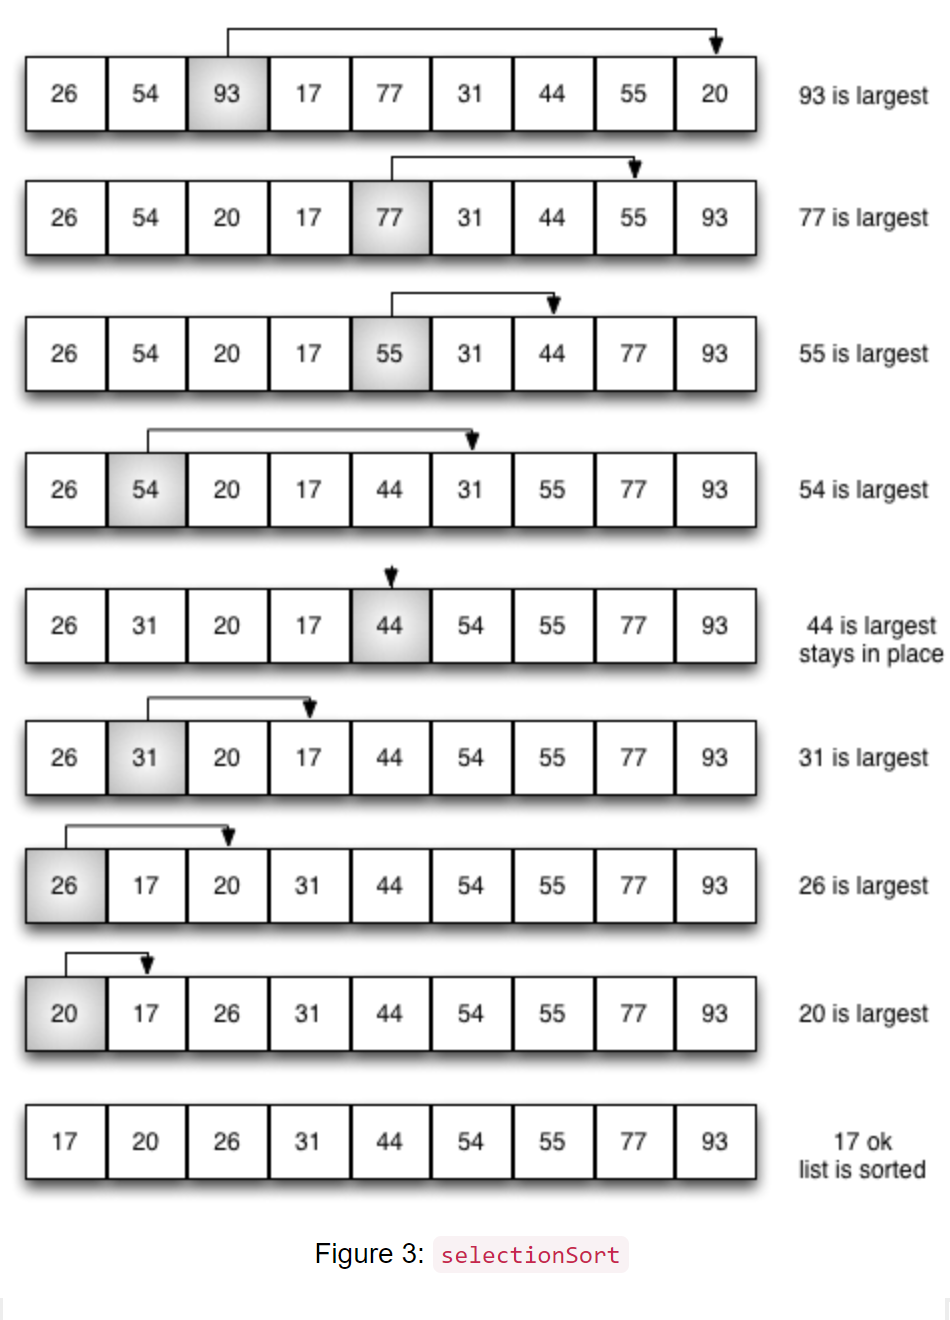

You may see that the selection sort makes the same number of comparisons as the bubble sort and is therefore also O(n2). However, due to the reduction in the number of exchanges, the selection sort typically executes faster in benchmark studies. In fact, for our list, the bubble sort makes 20 exchanges, while the selection sort makes only 8.

In [2]:
def selectionSort(alist):
   for fillslot in range(len(alist)-1,0,-1):
       positionOfMax=0
       for location in range(1,fillslot+1):
           if alist[location]>alist[positionOfMax]:
               positionOfMax = location

       temp = alist[fillslot]
       alist[fillslot] = alist[positionOfMax]
       alist[positionOfMax] = temp

alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### Insertion Sort
We begin by assuming that a list with one item (position 0) is already sorted. On each pass, one for each item 1 through n−1, the current item is checked against those in the already sorted sublist. The next item is inserted into the proper position 

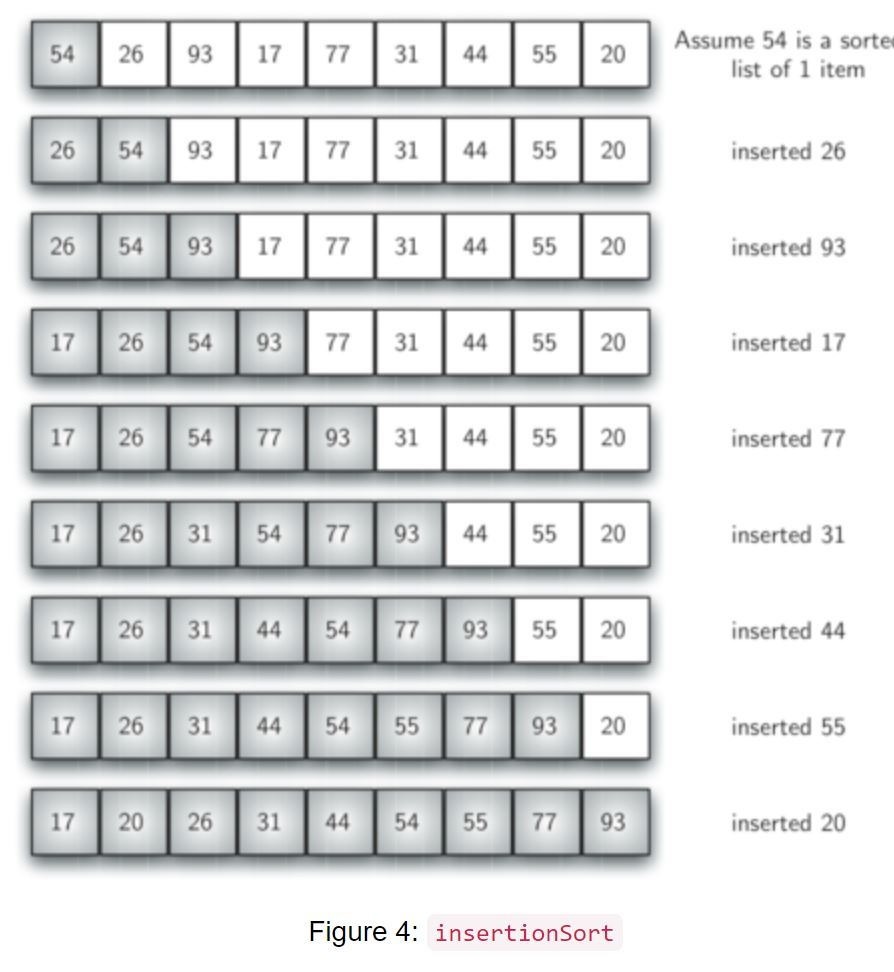


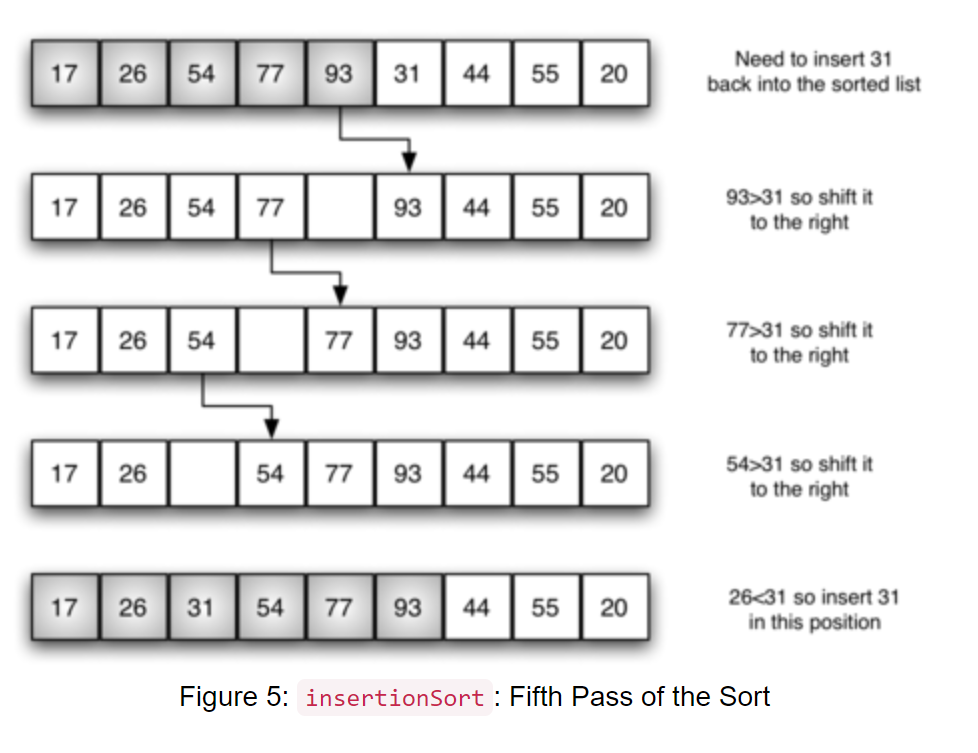


The maximum number of comparisons for an insertion sort is the sum of the first n−1 integers. Again, this is O(n<sup>2</sup>). However, in the best case, only one comparison needs to be done on each pass. This would be the case for an already sorted list.

In [3]:
def insertionSort(alist):
   for index in range(1,len(alist)):

     currentvalue = alist[index]
     position = index

     while position>0 and alist[position-1]>currentvalue:
         alist[position]=alist[position-1]
         position = position-1

     alist[position]=currentvalue

alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


### Shell Sort
The shell sort, sometimes called the “diminishing increment sort,” improves on the insertion sort by breaking the original list into a number of smaller sublists, each of which is sorted using an insertion sort. At the end, the merged roughly ordered list is perfectly ordered using insertion sort

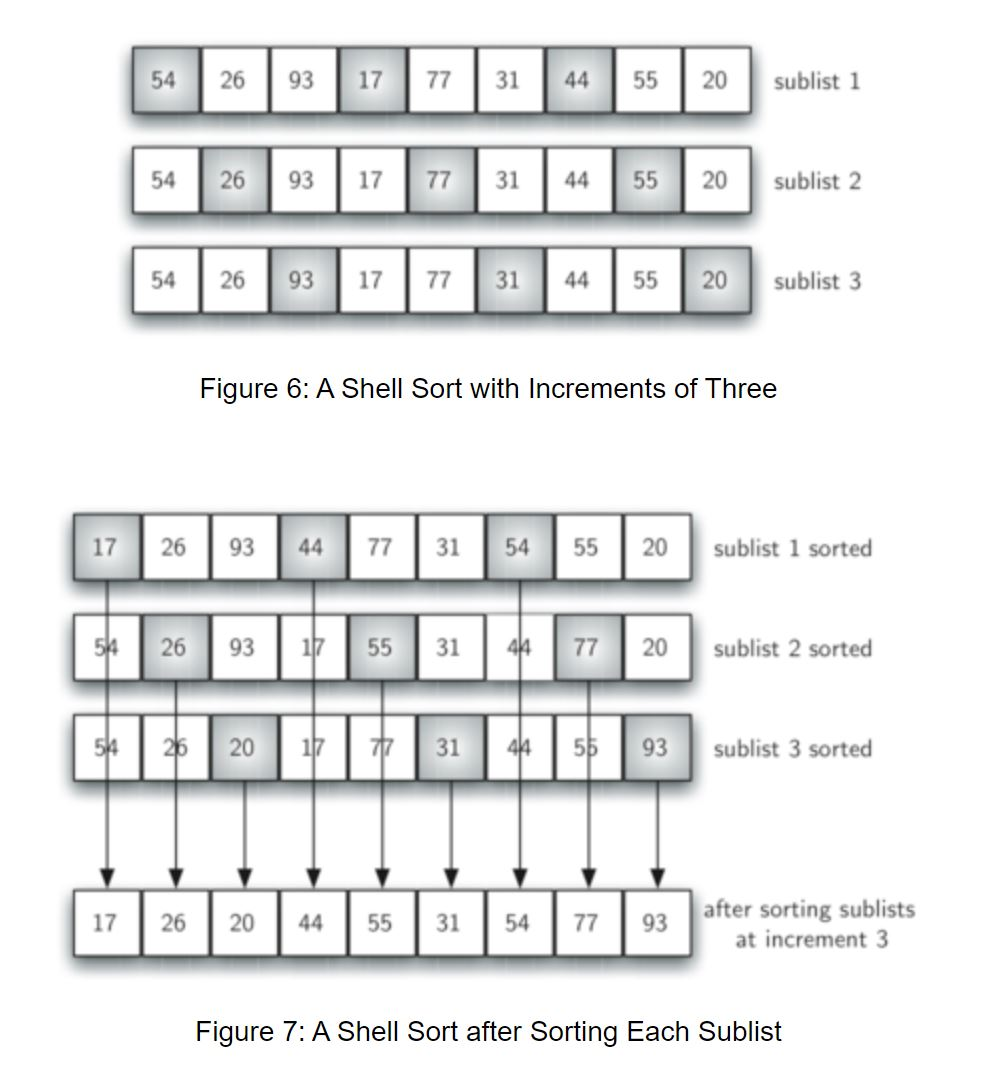

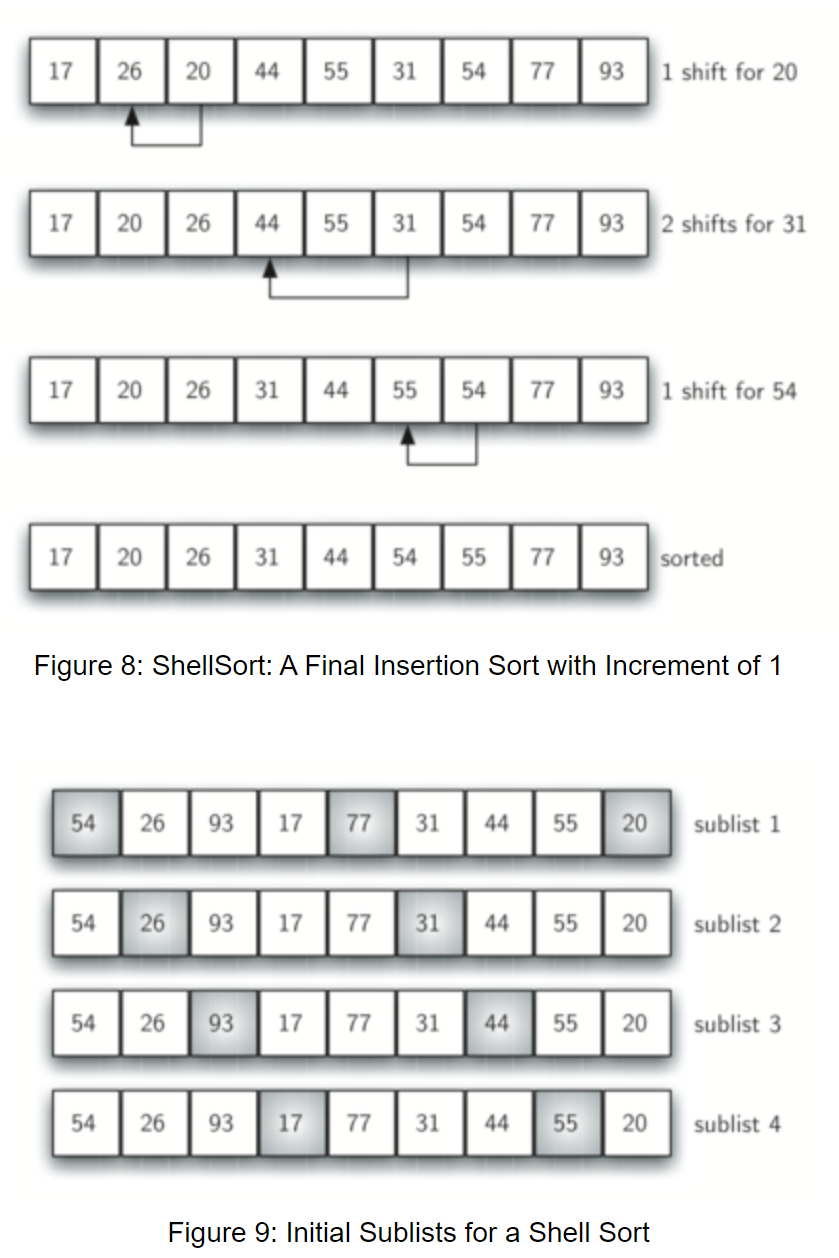

Although a general analysis of the shell sort is well beyond the scope of this text, we can say that it tends to fall somewhere between O(n) and O(n<sup>2</sup>), based on the behavior described above. In this example, performance is O(n<sup>2</sup>)

In [4]:
def shellSort(alist):
    sublistcount = len(alist)//2
    while sublistcount > 0:

      for startposition in range(sublistcount):
        gapInsertionSort(alist,startposition,sublistcount)

      print("After increments of size",sublistcount,
                                   "The list is",alist)

      sublistcount = sublistcount // 2

def gapInsertionSort(alist,start,gap):
    for i in range(start+gap,len(alist),gap):

        currentvalue = alist[i]
        position = i

        while position>=gap and alist[position-gap]>currentvalue:
            alist[position]=alist[position-gap]
            position = position-gap

        alist[position]=currentvalue

alist = [54,26,93,17,77,31,44,55,20]
shellSort(alist)
print(alist)

After increments of size 4 The list is [20, 26, 44, 17, 54, 31, 93, 55, 77]
After increments of size 2 The list is [20, 17, 44, 26, 54, 31, 77, 55, 93]
After increments of size 1 The list is [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


### Merge Sort
Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item we split the list and recursively invoke a merge sort on both halves. Once the two halves are sorted, the fundamental operation, called a merge, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted, new list

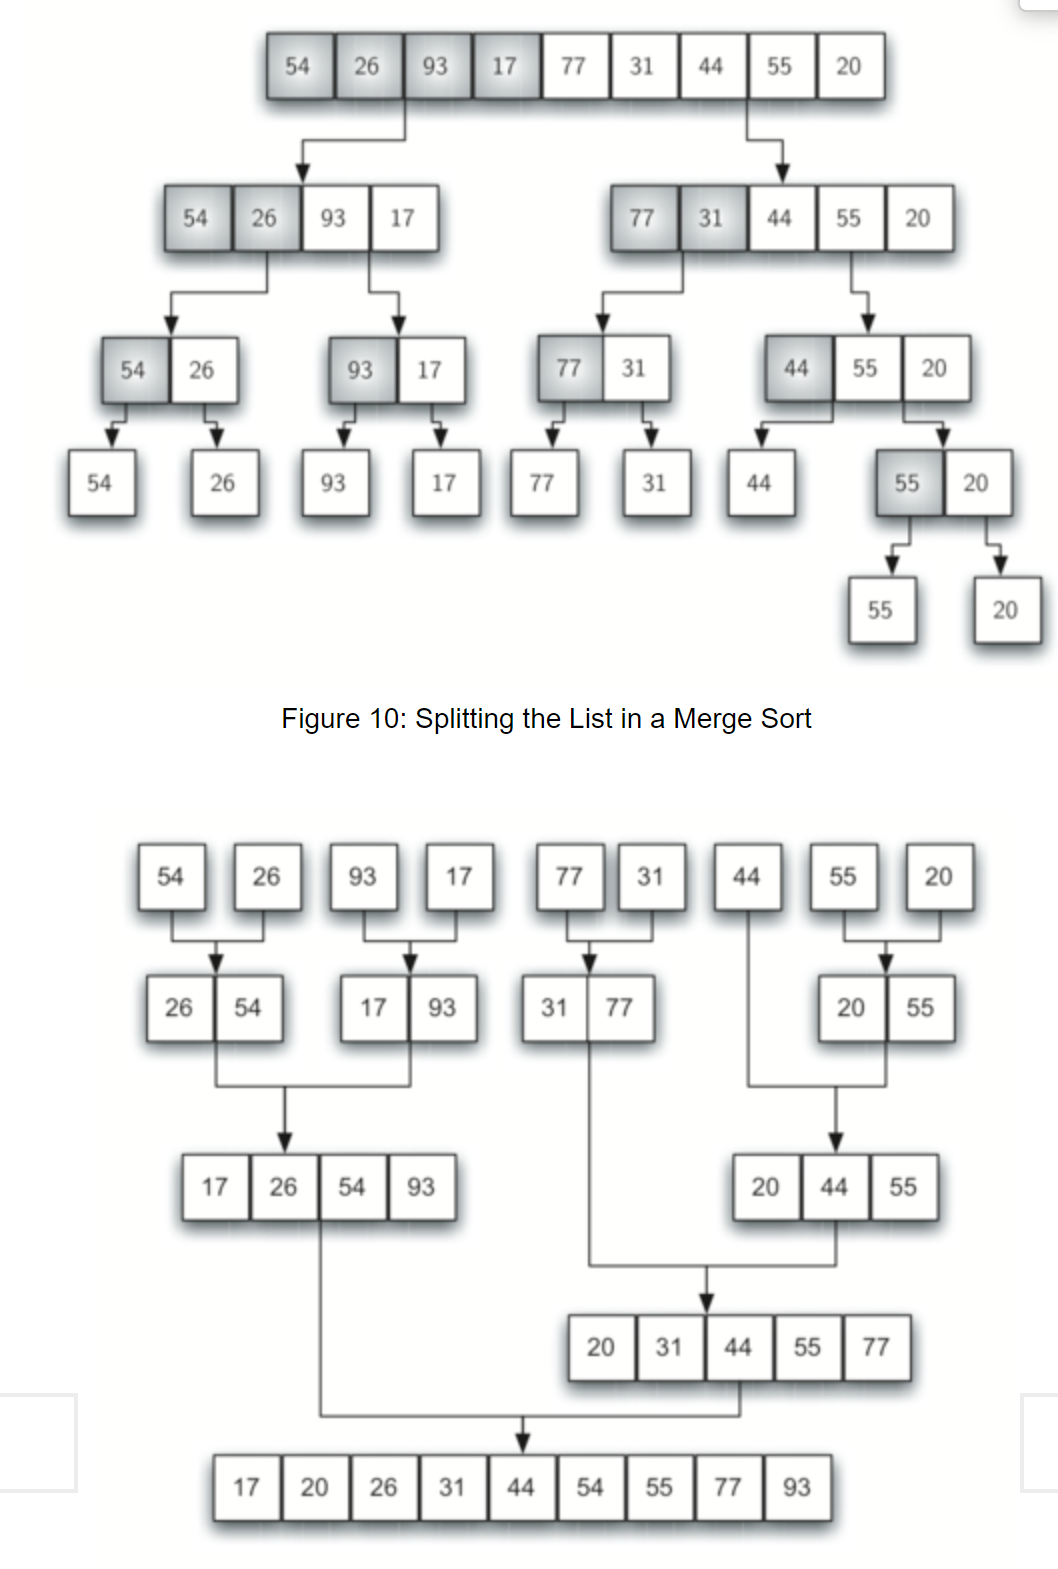


Merge Sort is the only guaranteed O(n log n) even in the worst case. The cost is that merge sort uses more memory.

In [5]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

Splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting  [54, 26, 93, 17]
Splitting  [54, 26]
Splitting  [54]
Merging  [54]
Splitting  [26]
Merging  [26]
Merging  [26, 54]
Splitting  [93, 17]
Splitting  [93]
Merging  [93]
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
Splitting  [77, 31, 44, 55, 20]
Splitting  [77, 31]
Splitting  [77]
Merging  [77]
Splitting  [31]
Merging  [31]
Merging  [31, 77]
Splitting  [44, 55, 20]
Splitting  [44]
Merging  [44]
Splitting  [55, 20]
Splitting  [55]
Merging  [55]
Splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


### Quick Sort
The quick sort uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage. A quick sort first selects a value, which is called the pivot value. The goal of the partition process is to move items that are on the wrong side with respect to the pivot value while also converging on the split point

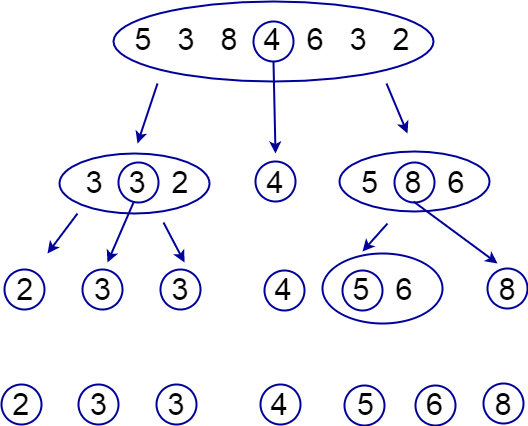

In [7]:
def quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:

        splitpoint = partition(alist,first,last)

        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark

### Summary

* A sequential search is O(n) for ordered and unordered lists.
* A binary search of an ordered list is O(logn) in the worst case.
* Hash tables can provide constant time searching.
* A bubble sort, a selection sort, and an insertion sort are O(n<sup>2</sup>) algorithms.
* A shell sort improves on the insertion sort by sorting incremental sublists. It falls between O(n) and O(n<sup>2</sup>).
* A merge sort is O(nlogn), but requires additional space for the merging process.
* A quick sort is O(nlogn), but may degrade to O(n<sup>2</sup>) if the split points are not near the middle of the list. It does not require additional space.